# IPL Auction Analysis



Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error


Importing Data

In [2]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("final_dataset.csv")
data.head()
data.shape


Saving final_dataset.csv to final_dataset.csv


(1052, 7)

In [3]:

data = data.iloc[:, 1:]
data.head()




Country                Player                         Team  \
0        Guyana  Christopher Barnwell  Royal Challengers Bangalore   
1  South Africa           Johan Botha             Delhi Daredevils   
2     Australia      Daniel Christian  Royal Challengers Bangalore   
3     Australia        Michael Clarke          Pune Warriors India   
4     Australia   Nathan Coulter-Nile               Mumbai Indians   

   Base price Winning bid  Year  
0        30.5        30.5  2013  
1       183.0       274.5  2013  
2        61.0        61.0  2013  
3       244.0       244.0  2013  
4        61.0       274.5  2013

In [4]:
data.describe()

Base price        Year
count  1052.000000  1052.00000
mean     65.252091  2018.31654
std      63.278684     3.15770
min      10.000000  2013.00000
25%      20.000000  2016.00000
50%      30.000000  2018.00000
75%     100.000000  2022.00000
max     244.000000  2023.00000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1052 non-null   object 
 1   Player       1052 non-null   object 
 2   Team         1052 non-null   object 
 3   Base price   1052 non-null   float64
 4   Winning bid  1052 non-null   object 
 5   Year         1052 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 49.4+ KB


Data Cleaning




In [6]:
# Check for missing values
data.isnull().sum()



Country        0
Player         0
Team           0
Base price     0
Winning bid    0
Year           0
dtype: int64

In [7]:
data.dtypes



Country         object
Player          object
Team            object
Base price     float64
Winning bid     object
Year             int64
dtype: object

In [8]:
data['Winning bid'].unique()

array(['30.5', '274.5', '61.0', '244.0', '12.2', '128.1', '305.0',
       '183.0', '610.0', '442.25', '381.25', '366.0', '411.75', '176.9',
       '427.0', '158.6', '259.25', '91.5', '320.25', '650', '550', '900',
       '320', '1,400', '500', '325', '475', '1,250', '260', '350', '220',
       '400', '240', '190', '450', '200', '280', '50', '275', '160',
       '150', '425', '90', '100', '70', '30', '600', '60', '65', '180',
       '130', '55', '80', '75', '120', '20', '10', '170', '300', '95',
       '45', '110', '85', '40', '375', '1600', '750', '25', '15', '140',
       '1050', '380', '230', '950', '700', '420', '480', '250', '210',
       '35', '850', '1450', '1200', '520', '760', '540', '1250', '940',
       '640', '560', '1100', '620', '360', '960', '740', '780', '800',
       '440', '580', '340', '880', '720', '1150', '840', '525', '1075',
       '1550', '1000', '675', '775', '1425', '1625', '1400', '925',
       '1500', '825', '725', '1225', '625', '460', '875', '575', '1525',


In [9]:
# Converting the 'Winning bid' column to string type before using .str
data['Winning bid'] = data['Winning bid'].astype(str).replace('₹', '', regex=False)
data['Winning bid'] = data['Winning bid'].astype(str).replace(',', '', regex=False)
data['Winning bid'] = data['Winning bid'].astype(str).replace('k', '000', regex=False)




In [10]:
data.head()

Country                Player                         Team  \
0        Guyana  Christopher Barnwell  Royal Challengers Bangalore   
1  South Africa           Johan Botha             Delhi Daredevils   
2     Australia      Daniel Christian  Royal Challengers Bangalore   
3     Australia        Michael Clarke          Pune Warriors India   
4     Australia   Nathan Coulter-Nile               Mumbai Indians   

   Base price Winning bid  Year  
0        30.5        30.5  2013  
1       183.0       274.5  2013  
2        61.0        61.0  2013  
3       244.0       244.0  2013  
4        61.0       274.5  2013

In [11]:
# converting 'Winning bid' to float, removing any unwanted characters
data['Winning bid'] = (data['Winning bid'].astype(str)
                       .str.replace('[\,,]', '', regex=True)  # Removing commas if present
                       .astype(float))  # Converting to float


data['Base price'] = data['Base price'].astype(float)


#  Year to Integer
data['Year'] =data['Year'].astype(int)


display(data.dtypes)





Country         object
Player          object
Team            object
Base price     float64
Winning bid    float64
Year             int64
dtype: object

In [12]:
data['Winning bid'] = pd.to_numeric(data['Winning bid'], errors='coerce')
missing_count = data['Winning bid'].isnull().sum()
f"Number of missing values in 'Winning bid': {missing_count}"


"Number of missing values in 'Winning bid': 0"

In [13]:
data['Country'] = data['Country'].str.strip()
country_counts = data['Country'].value_counts()
country_counts


Country
India                   668
Australia               117
England                  58
South Africa             54
New Zealand              47
Sri Lanka                21
West Indies              19
Trinidad and Tobago      11
Afghanistan              11
Barbados                 11
Bangladesh               10
Jamaica                   9
Guyana                    5
Saint Lucia               4
Zimbabwe                  2
Netherlands               1
United Arab Emirates      1
Nepal                     1
Ireland                   1
Namibia                   1
Name: count, dtype: int64

In [14]:
team_name_corrections = {
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Delhi Dardevils': 'Delhi Daredevils',
    'Kings XI Punjab': 'Punjab Kings',
    'Gujarat Lions': 'Gujarat Titans',
    'Pune Warriors India': 'Pune Warriors',
    'Delhi Capitals': 'Delhi Daredevils'
}

data['Team'] = data['Team'].replace(team_name_corrections)
team_counts = data['Team'].value_counts()
team_counts


Team
Delhi Daredevils               134
Sunrisers Hyderabad            125
Royal Challengers Bangalore    123
Punjab Kings                   122
Kolkata Knight Riders          116
Mumbai Indians                 115
Rajasthan Royals               111
Chennai Super Kings             90
Gujarat Titans                  57
Lucknow Super Giants            28
Rising Pune Supergiant          27
Pune Warriors                    4
Name: count, dtype: int64

In [15]:
#Feature engineering

from IPython.display import display, Markdown

data['Bid_to_Base_Price_Ratio'] = data['Winning bid'] / data['Base price']


data['Bid_Difference'] = data['Winning bid'] - data['Base price']


data['Avg_Bid_by_Year'] = data.groupby('Year')['Winning bid'].transform('mean')


data_player_stats = data.groupby('Player').agg(
    years_in_auction=('Year', 'count'),
    avg_winning_bid=('Winning bid', 'mean'),
 total_earnings=('Winning bid', 'sum'),
    teams_count=('Team', 'nunique')
    ).reset_index()


display(Markdown("# Player Statistics"))
display(data_player_stats)




data.head()

# Player Statistics

Player  years_in_auction  avg_winning_bid  total_earnings  \
0           Aaron Finch                 5            376.0          1880.0   
1          Abdul Basith                 2             20.0            40.0   
2           Abdul Samad                 1             20.0            20.0   
3        Abhijeet Tomar                 1             40.0            40.0   
4      Abhimanyu Mithun                 2             30.0            60.0   
..                  ...               ...              ...             ...   
588        Yusuf Pathan                 2            257.5           515.0   
589        Yuvraj Singh                 5            800.0          4000.0   
590    Yuzvendra Chahal                 3            420.0          1260.0   
591         Zaheer Khan                 2            330.0           660.0   
592  Zahir Khan Pakteen                 1             60.0            60.0   

     teams_count  
0              5  
1              1  
2              1  
3              1  
4              2  
..           ...  
588            2  
589            5  
590            2  
591            2  
592            1  

[593 rows x 5 columns]

Country                Player                         Team  \
0        Guyana  Christopher Barnwell  Royal Challengers Bangalore   
1  South Africa           Johan Botha             Delhi Daredevils   
2     Australia      Daniel Christian  Royal Challengers Bangalore   
3     Australia        Michael Clarke                Pune Warriors   
4     Australia   Nathan Coulter-Nile               Mumbai Indians   

   Base price  Winning bid  Year  Bid_to_Base_Price_Ratio  Bid_Difference  \
0        30.5         30.5  2013                      1.0             0.0   
1       183.0        274.5  2013                      1.5            91.5   
2        61.0         61.0  2013                      1.0             0.0   
3       244.0        244.0  2013                      1.0             0.0   
4        61.0        274.5  2013                      4.5           213.5   

   Avg_Bid_by_Year  
0       195.941892  
1       195.941892  
2       195.941892  
3       195.941892  
4       195.941892

In [16]:

top_players = data_player_stats.sort_values(by='avg_winning_bid', ascending=False).head(10)
display(Markdown("# Top 10 Most Expensive Players"))
display(top_players)


# Top 10 Most Expensive Players

Player  years_in_auction  avg_winning_bid  total_earnings  \
103      Cameron Green                 1      1750.000000          1750.0   
88          Ben Stokes                 3      1441.666667          4325.0   
184        Harry Brook                 1      1325.000000          1325.0   
573  Wanindu Hasaranga                 1      1075.000000          1075.0   
460         Sam Curran                 3      1040.000000          3120.0   
392    Prasidh Krishna                 1      1000.000000          1000.0   
172      Glenn Maxwell                 5       922.000000          4610.0   
287   M. Shahrukh Khan                 1       900.000000           900.0   
491   Sheldon Cottrell                 1       850.000000           850.0   
540          Tim David                 1       825.000000           825.0   

     teams_count  
103            1  
88             3  
184            1  
573            1  
460            2  
392            1  
172            4  
287            1  
491            1  
540            1

In [17]:
data['Years_in_Auction'] = data.groupby('Player')['Year'].transform('nunique')
data

Country                Player                         Team  \
0           Guyana  Christopher Barnwell  Royal Challengers Bangalore   
1     South Africa           Johan Botha             Delhi Daredevils   
2        Australia      Daniel Christian  Royal Challengers Bangalore   
3        Australia        Michael Clarke                Pune Warriors   
4        Australia   Nathan Coulter-Nile               Mumbai Indians   
...            ...                   ...                          ...   
1047       England              Joe Root             Rajasthan Royals   
1048    Bangladesh       Shakib al Hasan        Kolkata Knight Riders   
1049         India          Abdul Basith             Rajasthan Royals   
1050       England              Joe Root             Rajasthan Royals   
1051    Bangladesh       Shakib al Hasan        Kolkata Knight Riders   

      Base price  Winning bid  Year  Bid_to_Base_Price_Ratio  Bid_Difference  \
0           30.5         30.5  2013                      1.0             0.0   
1          183.0        274.5  2013                      1.5            91.5   
2           61.0         61.0  2013                      1.0             0.0   
3          244.0        244.0  2013                      1.0             0.0   
4           61.0        274.5  2013                      4.5           213.5   
...          ...          ...   ...                      ...             ...   
1047       100.0        100.0  2023                      1.0             0.0   
1048       150.0        150.0  2023                      1.0             0.0   
1049        20.0         20.0  2023                      1.0             0.0   
1050       100.0        100.0  2023                      1.0             0.0   
1051       150.0        150.0  2023                      1.0             0.0   

      Avg_Bid_by_Year  Years_in_Auction  
0          195.941892                 1  
1          195.941892                 1  
2          195.941892                 3  
3          195.941892                 1  
4          195.941892                 7  
...               ...               ...  
1047       205.421687                 1  
1048       205.421687                 1  
1049       205.421687                 1  
1050       205.421687                 1  
1051       205.421687                 1  

[1052 rows x 10 columns]

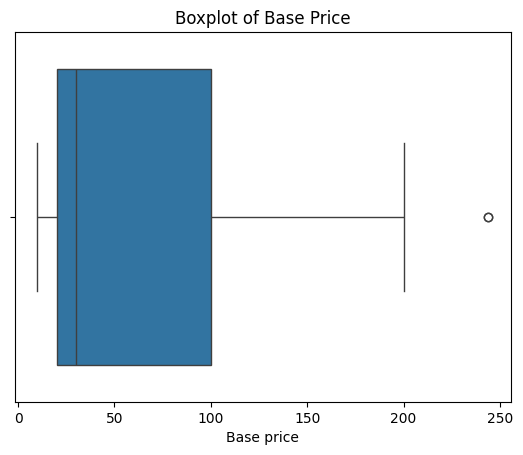

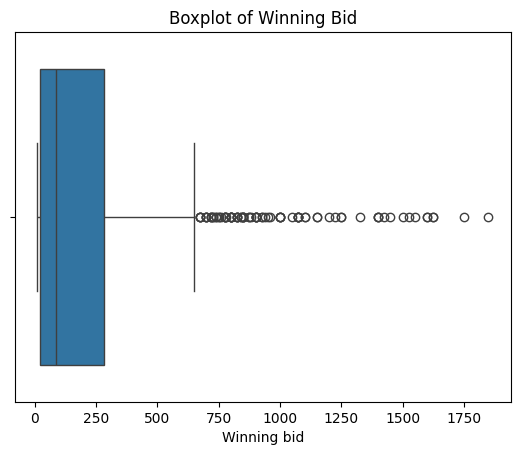

In [18]:


# Visualizing outliers in 'Base price' and 'Winning bid'
sns.boxplot(x=data['Base price'])
plt.title('Boxplot of Base Price')
plt.show()

sns.boxplot(x=data['Winning bid'])
plt.title('Boxplot of Winning Bid')
plt.show()


In [19]:
# Calculating IQR for Base price
Q1 = data['Base price'].quantile(0.25)
Q3 = data['Base price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_base = Q1 - 1.5 * IQR
upper_bound_base = Q3 + 1.5 * IQR

# Identifying outliers for Base price
base_outliers = data[(data['Base price'] < lower_bound_base) | (data['Base price'] > upper_bound_base)]
display(Markdown("### Outliers in Base Price"))
display(base_outliers)

# Similarly for Winning bid
Q1_bid = data['Winning bid'].quantile(0.25)
Q3_bid = data['Winning bid'].quantile(0.75)
IQR_bid = Q3_bid - Q1_bid

lower_bound_bid = Q1_bid - 1.5 * IQR_bid
upper_bound_bid = Q3_bid + 1.5 * IQR_bid

bid_outliers = data[(data['Winning bid'] < lower_bound_bid) | (data['Winning bid'] > upper_bound_bid)]
display(Markdown("### Outliers in Winning Bid"))
display(bid_outliers)



### Outliers in Base Price

Country          Player            Team  Base price  Winning bid  Year  \
3   Australia  Michael Clarke   Pune Warriors       244.0        244.0  2013   
27  Australia   Ricky Ponting  Mumbai Indians       244.0        244.0  2013   

    Bid_to_Base_Price_Ratio  Bid_Difference  Avg_Bid_by_Year  Years_in_Auction  
3                       1.0             0.0       195.941892                 1  
27                      1.0             0.0       195.941892                 1

### Outliers in Winning Bid

Country           Player                         Team  Base price  \
39       England  Kevin Pietersen             Delhi Daredevils       200.0   
41         India     Yuvraj Singh  Royal Challengers Bangalore       200.0   
47         India   Dinesh Karthik             Delhi Daredevils       200.0   
199        India     Yuvraj Singh             Delhi Daredevils       200.0   
200    Sri Lanka   Angelo Mathews             Delhi Daredevils       150.0   
..           ...              ...                          ...         ...   
971        India   Mayank Agarwal          Sunrisers Hyderabad       100.0   
973      England       Sam Curran                 Punjab Kings       200.0   
977    Australia    Cameron Green               Mumbai Indians       200.0   
978      England       Ben Stokes          Chennai Super Kings       200.0   
979  West Indies  Nicholas Pooran         Lucknow Super Giants       200.0   

     Winning bid  Year  Bid_to_Base_Price_Ratio  Bid_Difference  \
39         900.0  2014                    4.500           700.0   
41        1400.0  2014                    7.000          1200.0   
47        1250.0  2014                    6.250          1050.0   
199       1600.0  2015                    8.000          1400.0   
200        750.0  2015                    5.000           600.0   
..           ...   ...                      ...             ...   
971        825.0  2023                    8.250           725.0   
973       1850.0  2023                    9.250          1650.0   
977       1750.0  2023                    8.750          1550.0   
978       1625.0  2023                    8.125          1425.0   
979       1600.0  2023                    8.000          1400.0   

     Avg_Bid_by_Year  Years_in_Auction  
39        172.467532                 3  
41        172.467532                 5  
47        172.467532                 5  
199       132.272727                 5  
200       132.272727                 2  
..               ...               ...  
971       205.421687                 3  
973       205.421687                 3  
977       205.421687                 1  
978       205.421687                 3  
979       205.421687                 4  

[85 rows x 10 columns]

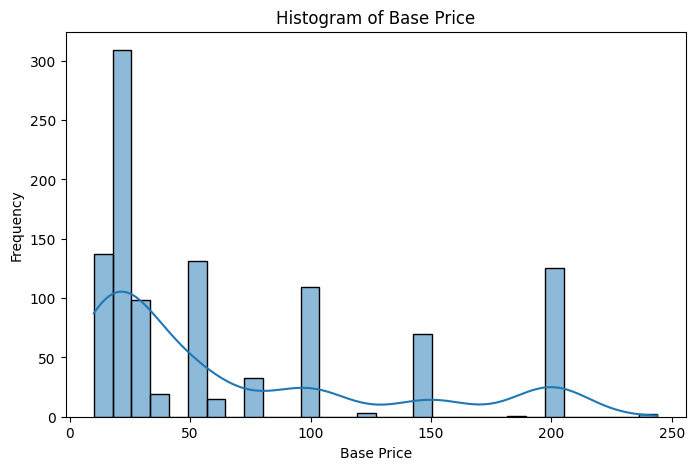

In [20]:
# Plot histogram of Base price
plt.figure(figsize=(8,5))
sns.histplot(data['Base price'], bins=30, kde=True)
plt.title("Histogram of Base Price")
plt.xlabel("Base Price")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Calculating skewness of the 'Winning bid' column
skewness_value = data['Base price'].skew()
f"Skewness of Base Price: {skewness_value}"


'Skewness of Base Price: 1.166191057755798'

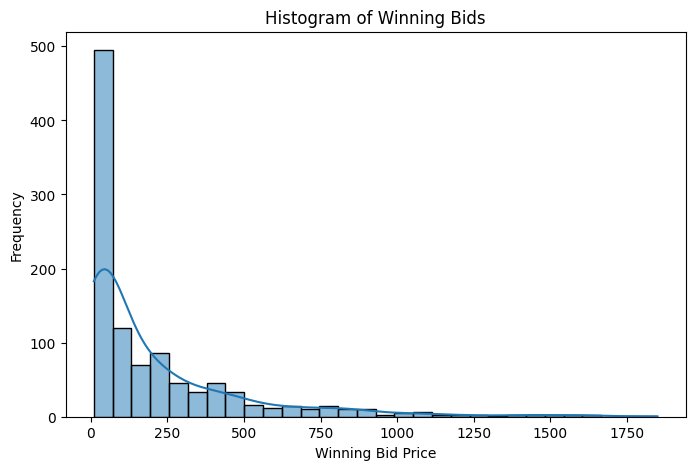

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.histplot(data['Winning bid'], bins=30, kde=True)  # KDE=True adds a density curve
plt.title("Histogram of Winning Bids")
plt.xlabel("Winning Bid Price")
plt.ylabel("Frequency")
plt.show()



In [23]:
# 'data' is  original DataFrame
data_copy = data.copy()  # Creating an independent copy

Q1 = data_copy['Winning bid'].quantile(0.25)  # (25th percentile)
Q3 = data_copy['Winning bid'].quantile(0.75)  #(75th percentile)
IQR = Q3 - Q1  # Interquartile Range

#  threshold (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Removing outliers
data_cleaned = data_copy[(data_copy['Winning bid'] >= lower_bound) & (data_copy['Winning bid'] <= upper_bound)]


print(f"Original Data Size: {len(data_copy)}")
print(f"Cleaned Data Size: {len(data_cleaned)}")
print(f"Number of Outliers Removed: {len(data_copy) - len(data_cleaned)}")


Original Data Size: 1052
Cleaned Data Size: 967
Number of Outliers Removed: 85


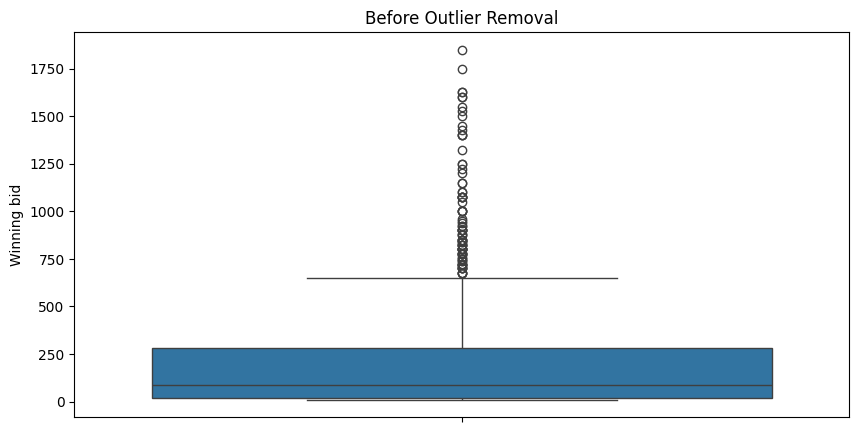

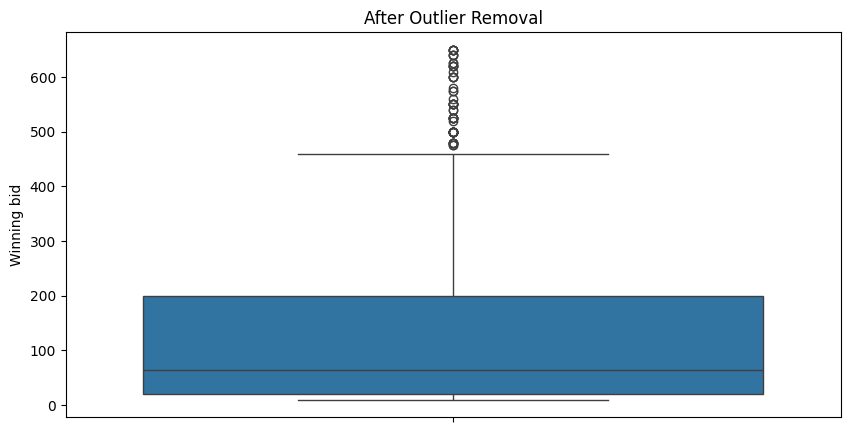

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before Outlier Removal
plt.figure(figsize=(10,5))
sns.boxplot(data_copy['Winning bid'])
plt.title("Before Outlier Removal")
plt.show()

# After Outlier Removal
plt.figure(figsize=(10,5))
sns.boxplot(data_cleaned['Winning bid'])
plt.title("After Outlier Removal")
plt.show()

In [25]:
print("Skewness after outlier removal:", data_cleaned['Winning bid'].skew())


Skewness after outlier removal: 1.3898797151756623


In [26]:
#using treshhold method
mean_winning_bid = data_copy['Winning bid'].mean()
variance_winning_bid = data_copy['Winning bid'].var()
std_winning_bid = np.sqrt(variance_winning_bid)  # Standard deviation

print(f"Mean Winning Bid: {mean_winning_bid}")
print(f"Variance of Winning Bid: {variance_winning_bid}")
print(f"Standard Deviation of Winning Bid: {std_winning_bid}")


Mean Winning Bid: 209.43902091254753
Variance of Winning Bid: 84132.25404918248
Standard Deviation of Winning Bid: 290.05560509871634


In [27]:
# Defining the threshold (Removing values beyond 3 standard deviations)
threshold = 3
lower_bound = mean_winning_bid - (threshold * std_winning_bid)
upper_bound = mean_winning_bid + (threshold * std_winning_bid)

data_cleaned = data_copy[(data_copy['Winning bid'] >= lower_bound) & (data_copy['Winning bid'] <= upper_bound)]

print(f"Original Data Size: {len(data_copy)}")
print(f"Cleaned Data Size: {len(data_cleaned)}")
print(f"Number of Outliers Removed: {len(data_copy) - len(data_cleaned)}")


Original Data Size: 1052
Cleaned Data Size: 1029
Number of Outliers Removed: 23


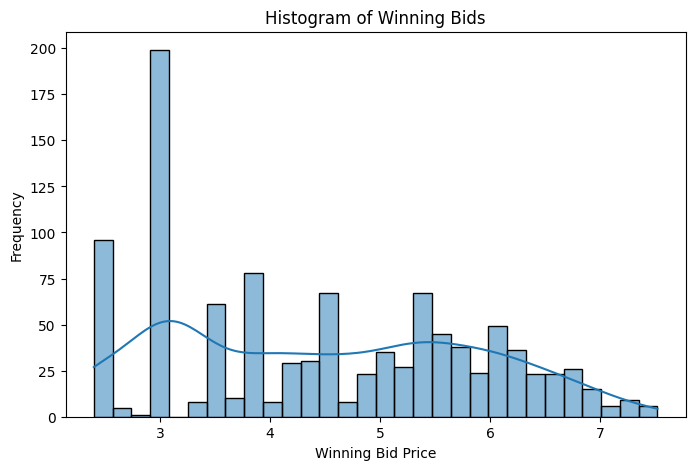

In [28]:
#Log Transformation
data_copy['Winning bid'] = np.log1p(data_copy['Winning bid'])
plt.figure(figsize=(8,5))
sns.histplot(data_copy['Winning bid'], bins=30, kde=True)
plt.title("Histogram of Winning Bids")
plt.xlabel("Winning Bid Price")
plt.ylabel("Frequency")
plt.show()


In [29]:
from scipy.stats import skew

"Skewness:", data_copy["Winning bid"].skew()


('Skewness:', np.float64(0.16079896038994354))

In [30]:
data.describe()


Base price  Winning bid        Year  Bid_to_Base_Price_Ratio  \
count  1052.000000  1052.000000  1052.00000              1052.000000   
mean     65.252091   209.439021  2018.31654                 3.735274   
std      63.278684   290.055605     3.15770                 5.819667   
min      10.000000    10.000000  2013.00000                 1.000000   
25%      20.000000    20.000000  2016.00000                 1.000000   
50%      30.000000    85.000000  2018.00000                 1.100000   
75%     100.000000   280.000000  2022.00000                 3.762500   
max     244.000000  1850.000000  2023.00000                50.000000   

       Bid_Difference  Avg_Bid_by_Year  Years_in_Auction  
count     1052.000000      1052.000000       1052.000000  
mean       144.186930       209.439021          2.463878  
std        257.702583        49.889760          1.501546  
min          0.000000       132.272727          1.000000  
25%          0.000000       172.467532          1.000000  
50%          5.000000       205.421687          2.000000  
75%        183.000000       255.443787          3.000000  
max       1650.000000       270.808824         10.000000

Data Visualization

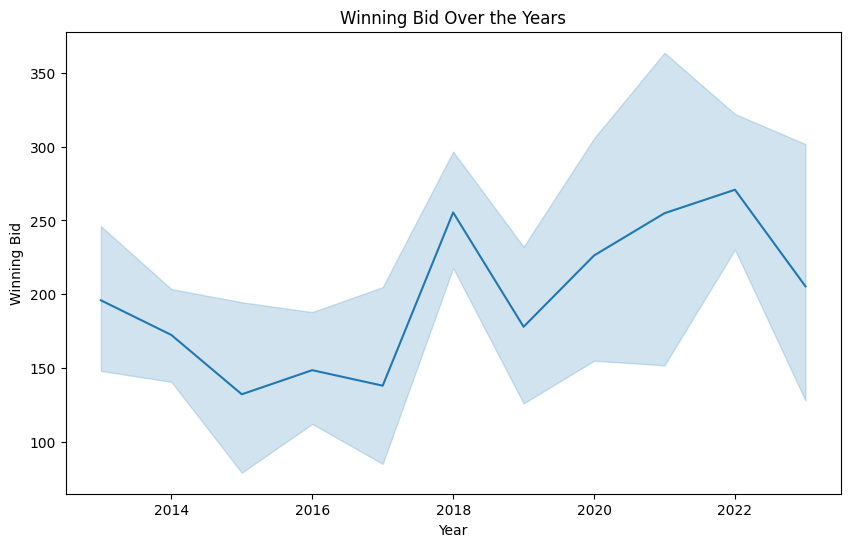

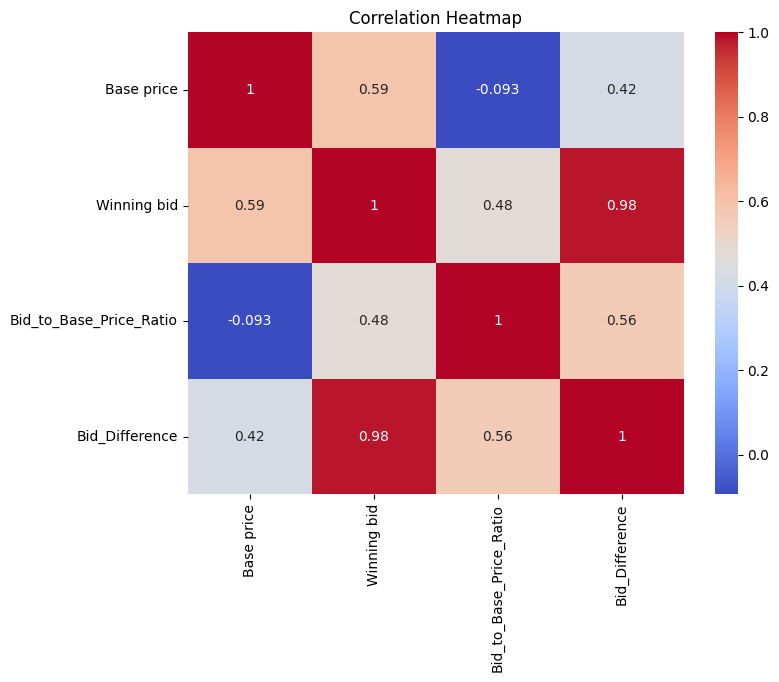

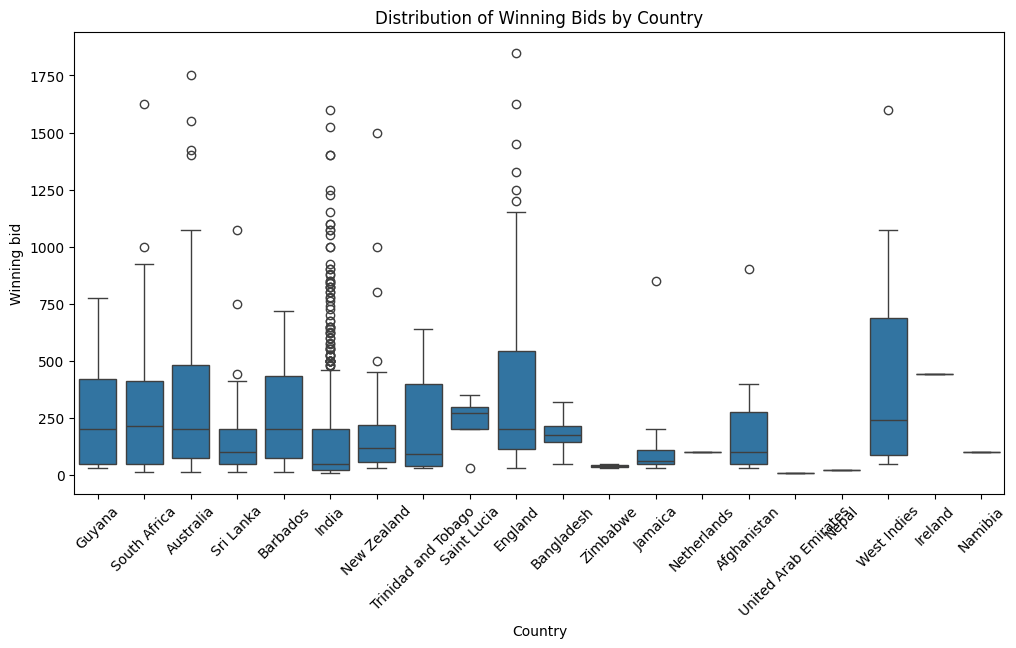

In [31]:

# Plotting Winning Bid over the Years
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Winning bid', data=data)
plt.title('Winning Bid Over the Years')
plt.xlabel('Year')
plt.ylabel('Winning Bid')
plt.show()

# Correlation Heatmap
corr = data[['Base price', 'Winning bid', 'Bid_to_Base_Price_Ratio', 'Bid_Difference']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot for Bid Distribution per Country
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Winning bid', data=data)
plt.title('Distribution of Winning Bids by Country')
plt.xticks(rotation=45)
plt.show()




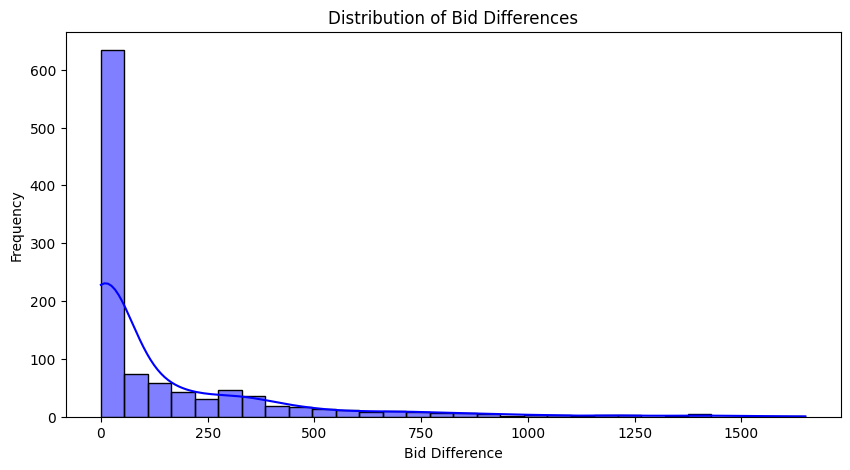

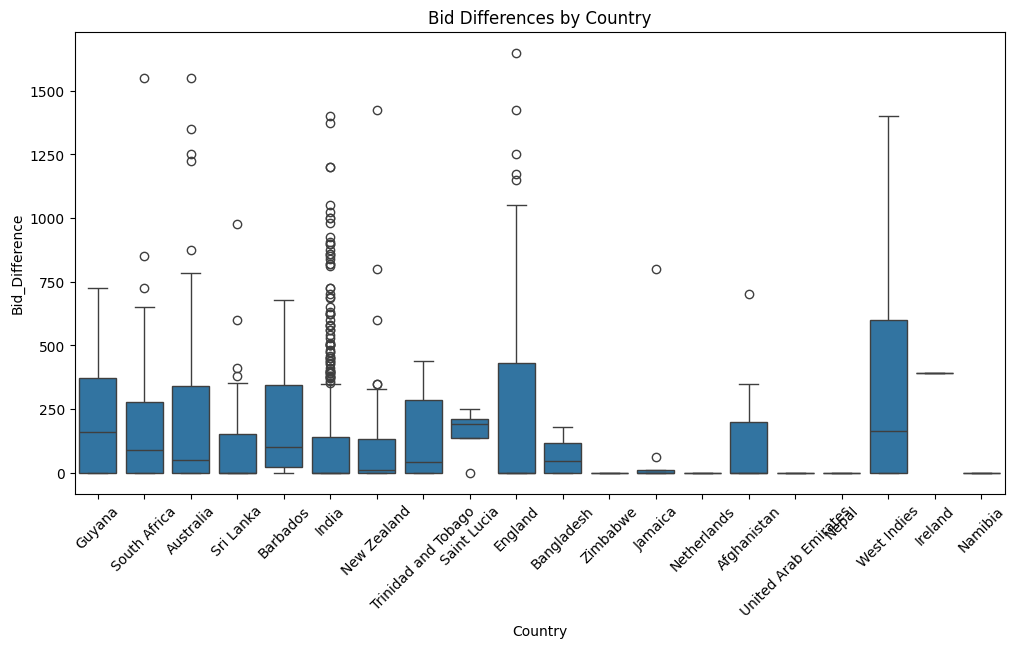

Country        mean   median         std
0            Afghanistan  135.454545    0.000  231.791442
1              Australia  215.504274   50.000  313.531027
2             Bangladesh   61.000000   45.000   68.386158
3               Barbados  198.827273  100.000  223.203334
4                England  267.844828    0.000  421.530328
5                 Guyana  251.000000  160.000  305.417747
6                  India  115.392216    0.000  216.831301
7                Ireland  390.000000  390.000         NaN
8                Jamaica   96.666667    0.000  264.480623
9                Namibia    0.000000    0.000         NaN
10                 Nepal    0.000000    0.000         NaN
11           Netherlands    0.000000    0.000         NaN
12           New Zealand  118.991489   10.000  253.639978
13           Saint Lucia  157.062500  189.125  108.824855
14          South Africa  190.195370   90.000  281.051231
15             Sri Lanka  142.797619    0.000  260.319595
16   Trinidad and Tobago  140.127273   40.000  169.754464
17  United Arab Emirates    0.000000    0.000         NaN
18           West Indies  316.842105  165.000  405.453143
19              Zimbabwe    0.000000    0.000    0.000000

### Outliers in Bid Differences:

Country           Player                         Team  Base price  \
14     Australia    Glenn Maxwell               Mumbai Indians       122.0   
39       England  Kevin Pietersen             Delhi Daredevils       200.0   
41         India     Yuvraj Singh  Royal Challengers Bangalore       200.0   
47         India   Dinesh Karthik             Delhi Daredevils       200.0   
90     Australia    Glenn Maxwell                 Punjab Kings       100.0   
..           ...              ...                          ...         ...   
977    Australia    Cameron Green               Mumbai Indians       200.0   
978      England       Ben Stokes          Chennai Super Kings       200.0   
979  West Indies  Nicholas Pooran         Lucknow Super Giants       200.0   
998        India      Shivam Mavi               Gujarat Titans        40.0   
999        India     Mukesh Kumar             Delhi Daredevils        20.0   

     Winning bid  Year  Bid_to_Base_Price_Ratio  Bid_Difference  \
14         610.0  2013                    5.000           488.0   
39         900.0  2014                    4.500           700.0   
41        1400.0  2014                    7.000          1200.0   
47        1250.0  2014                    6.250          1050.0   
90         600.0  2014                    6.000           500.0   
..           ...   ...                      ...             ...   
977       1750.0  2023                    8.750          1550.0   
978       1625.0  2023                    8.125          1425.0   
979       1600.0  2023                    8.000          1400.0   
998        600.0  2023                   15.000           560.0   
999        550.0  2023                   27.500           530.0   

     Avg_Bid_by_Year  Years_in_Auction  
14        195.941892                 5  
39        172.467532                 3  
41        172.467532                 5  
47        172.467532                 5  
90        172.467532                 5  
..               ...               ...  
977       205.421687                 1  
978       205.421687                 3  
979       205.421687                 4  
998       205.421687                 3  
999       205.421687                 1  

[101 rows x 10 columns]

In [32]:

#  Distribution of Bid Differences
plt.figure(figsize=(10,5))
sns.histplot(data['Bid_Difference'], bins=30, kde=True, color='blue')
plt.title("Distribution of Bid Differences")
plt.xlabel("Bid Difference")
plt.ylabel("Frequency")
plt.show()

# Boxplot of Bid Differences by Country
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Bid_Difference', data=data)
plt.title("Bid Differences by Country")
plt.xticks(rotation=45)
plt.show()

#  Summary Statistics for Each Category (e.g., Country)
summary = data.groupby('Country')['Bid_Difference'].agg(['mean', 'median', 'std']).reset_index()
display(summary)

# Detecting Outliers using IQR Method
Q1 = data['Bid_Difference'].quantile(0.25)
Q3 = data['Bid_Difference'].quantile(0.75)
IQR = Q3 - Q1

# Defining Outlier Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering Outliers
outliers = data[(data['Bid_Difference'] < lower_bound) | (data['Bid_Difference'] > upper_bound)]

display(Markdown("### Outliers in Bid Differences:"))
display(outliers)


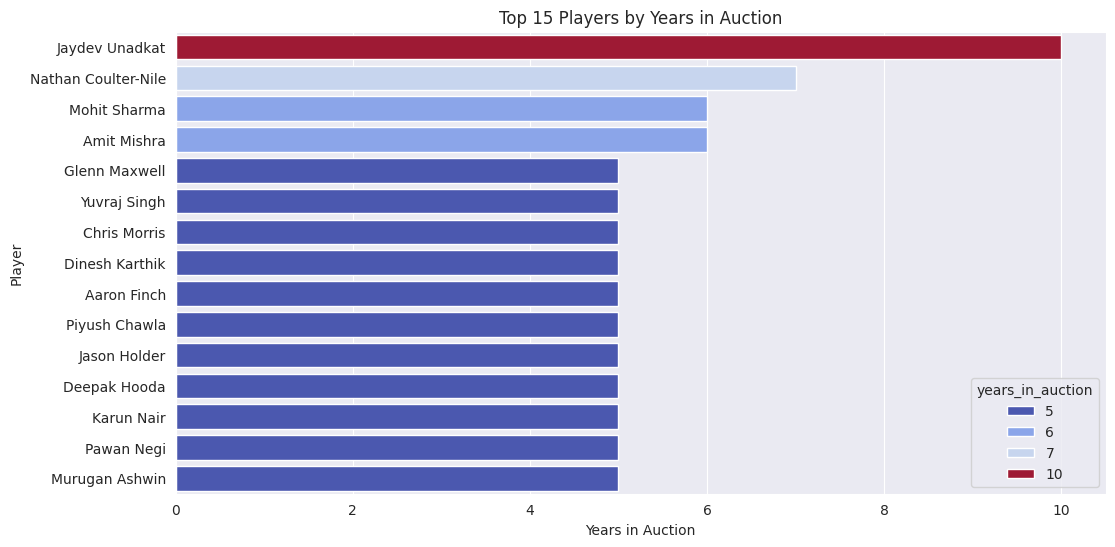

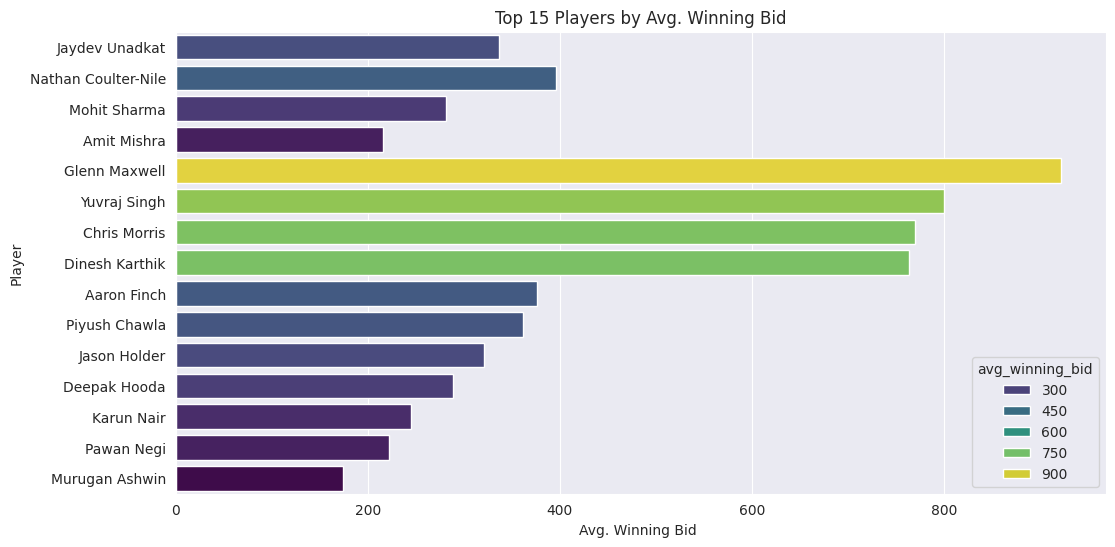

In [33]:
# Sorting values in descending order
data_sorted = data_player_stats.sort_values(by=['years_in_auction', 'avg_winning_bid'], ascending=[False, False])

# Selecting top 15 players for better visualization
data_top = data_sorted.head(15)


sns.set_style("darkgrid")

#  Plot Years in Auction
plt.figure(figsize=(12, 6))
sns.barplot(y='Player', x='years_in_auction',hue='years_in_auction' ,data=data_top, palette='coolwarm')
plt.xlabel("Years in Auction")
plt.ylabel("Player")
plt.title("Top 15 Players by Years in Auction")
plt.show()

#  Plot Avg. Winning Bid
plt.figure(figsize=(12, 6))
sns.barplot(y='Player', x='avg_winning_bid',hue='avg_winning_bid' ,data=data_top, palette='viridis')
plt.xlabel("Avg. Winning Bid ")
plt.ylabel("Player")
plt.title("Top 15 Players by Avg. Winning Bid")
plt.show()

Player  Winning bid                         Team
973       Sam Curran       1850.0                 Punjab Kings
977    Cameron Green       1750.0               Mumbai Indians
713     Chris Morris       1625.0             Rajasthan Royals
978       Ben Stokes       1625.0          Chennai Super Kings
199     Yuvraj Singh       1600.0             Delhi Daredevils
979  Nicholas Pooran       1600.0         Lucknow Super Giants
653      Pat Cummins       1550.0        Kolkata Knight Riders
790     Ishan Kishan       1525.0               Mumbai Indians
736    Kyle Jamieson       1500.0  Royal Challengers Bangalore
354       Ben Stokes       1450.0       Rising Pune Supergiant

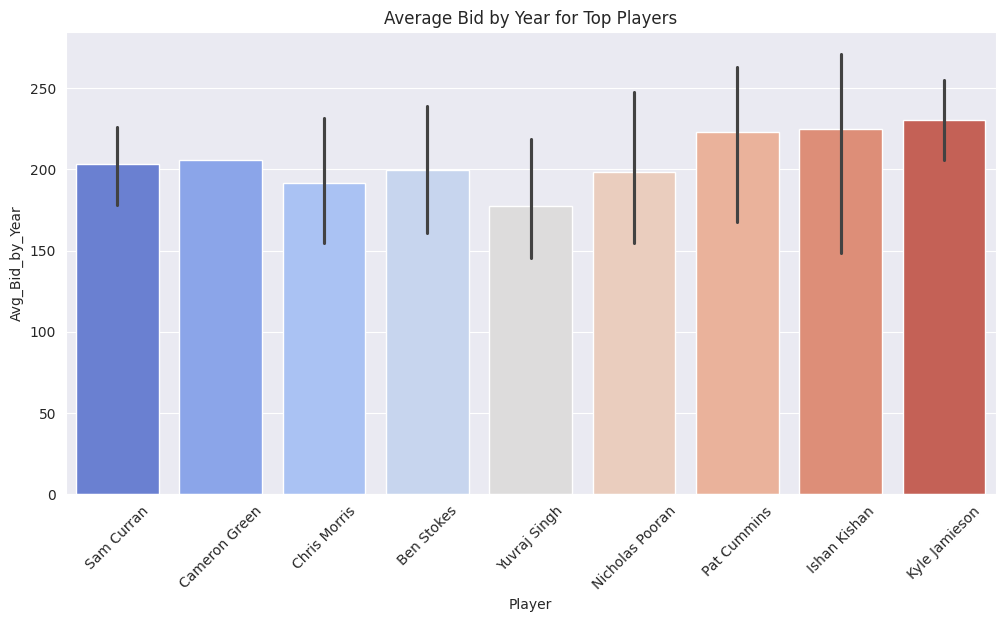

In [34]:
top_players = data.nlargest(10, "Winning bid")[["Player", "Winning bid", "Team"]]
display(top_players)

# Merging top_players with the original data to get 'Avg_Bid_by_Year'
top_players = pd.merge(top_players, data[['Player', 'Avg_Bid_by_Year']], on='Player', how='left')

# Average Bid Comparison
plt.figure(figsize=(12,6))
sns.barplot(data=top_players, x='Player', y='Avg_Bid_by_Year', hue='Player', palette='coolwarm', legend=False)
plt.title('Average Bid by Year for Top Players')
plt.xticks(rotation=45)
plt.show()

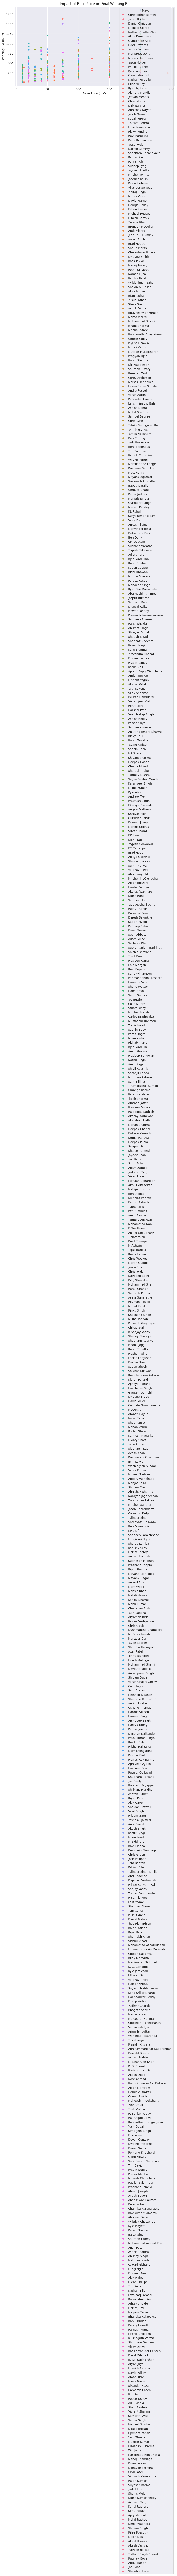

In [35]:
#This will help identify if a higher base price leads to a higher winning bid.
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Base price'], y=data['Winning bid'], hue=data['Player'])
plt.xlabel("Base Price (in Cr)")
plt.ylabel("Winning Bid (in Cr)")
plt.title("Impact of Base Price on Final Winning Bid")
plt.show()

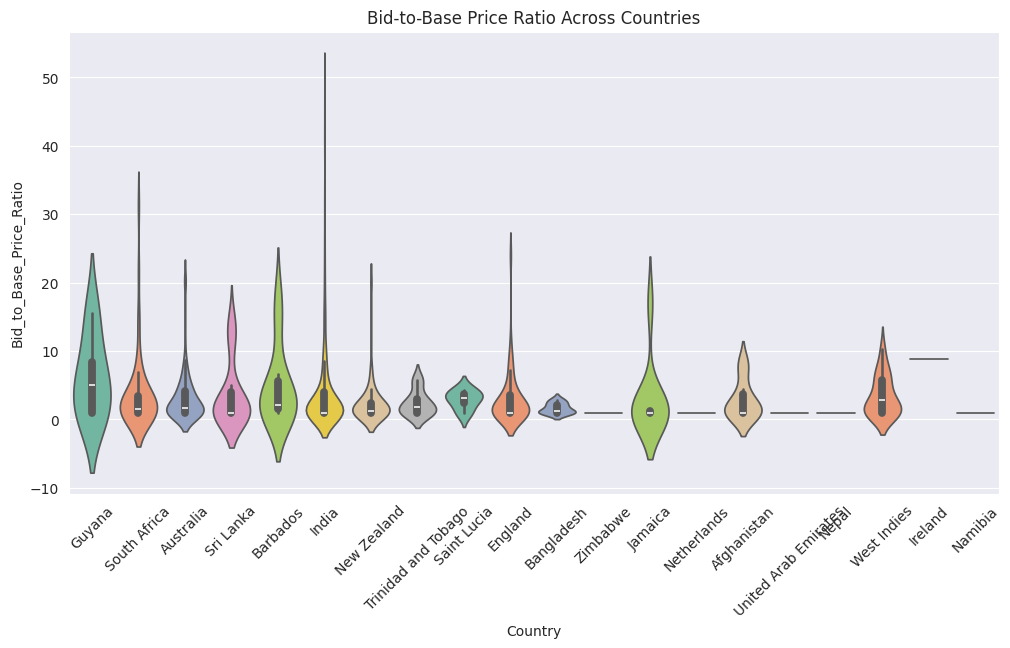

In [36]:
# Bid-to-Base Price Ratio by Country
plt.figure(figsize=(12,6))
sns.violinplot(data=data, x='Country', y='Bid_to_Base_Price_Ratio', hue='Country', palette='Set2', legend=False)

plt.title('Bid-to-Base Price Ratio Across Countries')
plt.xticks(rotation=45)
plt.show()

Top 10 Players Who Changed Teams Frequently:


Player  Unique Teams
216       Jaydev Unadkat             7
345       Murugan Ashwin             5
589         Yuvraj Singh             5
209         Jason Holder             5
0            Aaron Finch             5
351  Nathan Coulter-Nile             5
206        James Neesham             5
36           Amit Mishra             5
39            Andrew Tye             4
398         Pravin Tambe             4

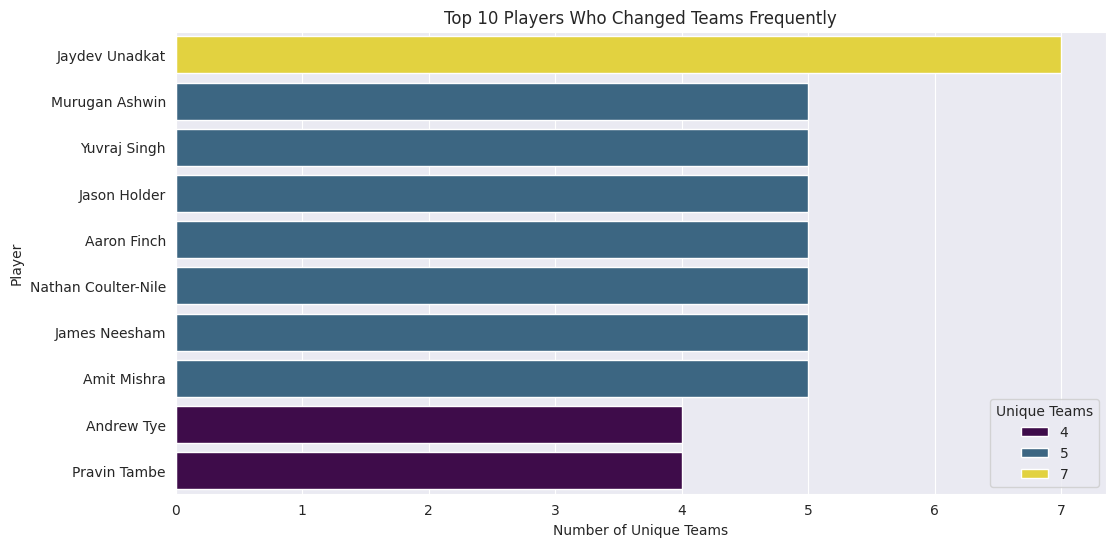

In [37]:
# to Find Top 10 Players Who Changed Teams Frequently

# Grouping by Player and counting unique teams they played for
team_changes = data.groupby('Player')['Team'].nunique().reset_index()

# Sorting in descending order to get top 10
top_movers = team_changes.sort_values(by='Team', ascending=False).head(10)

top_movers.columns = ['Player', 'Unique Teams']


print("Top 10 Players Who Changed Teams Frequently:")
display(top_movers)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(y=top_movers['Player'], x=top_movers['Unique Teams'], hue=top_movers['Unique Teams'], palette="viridis")
plt.xlabel("Number of Unique Teams")
plt.ylabel("Player")
plt.title("Top 10 Players Who Changed Teams Frequently")
plt.show()


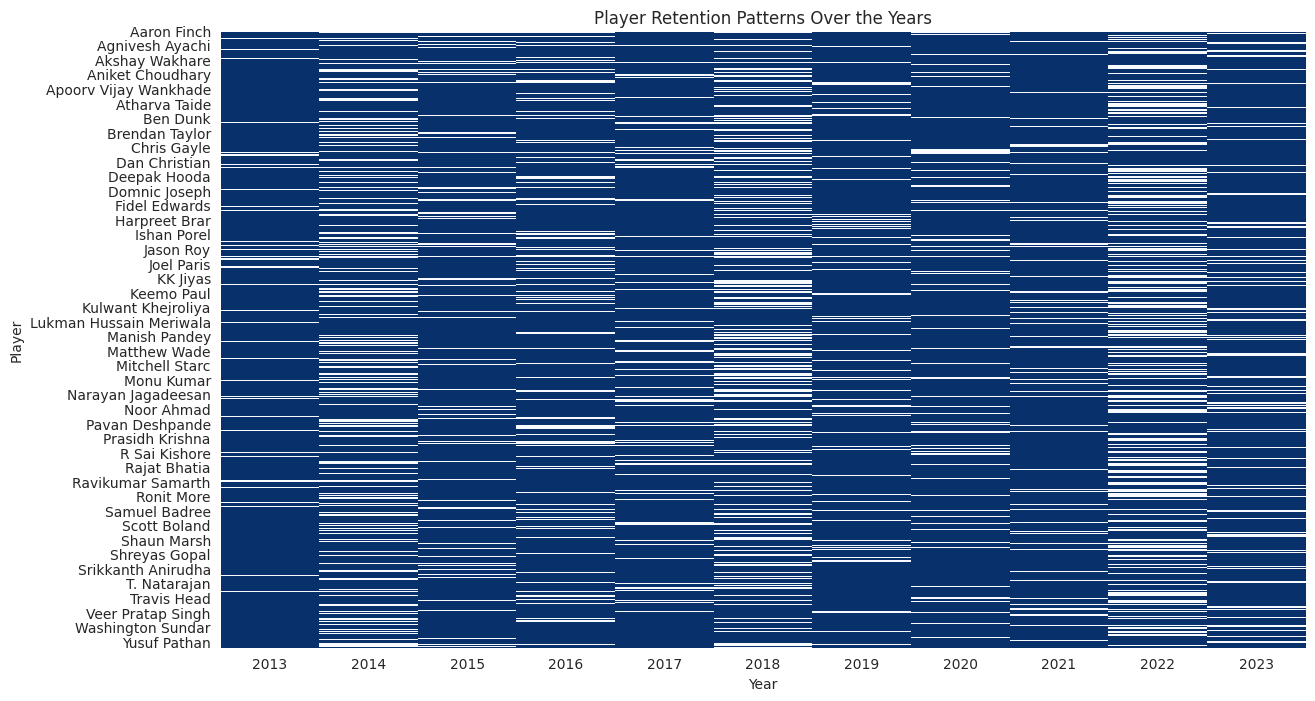

In [38]:
# Pivot table to count team changes per player
retention_data = data.pivot_table(index='Player', columns='Year', values='Team', aggfunc='first')

# Heatmap for visualizing team changes
plt.figure(figsize=(14, 8))
sns.heatmap(retention_data.isnull(), cbar=False, cmap='Blues')

plt.title('Player Retention Patterns Over the Years')
plt.xlabel('Year')
plt.ylabel('Player')
plt.show()

# Continuous non-null blocks = player retained by the same team.
#Gaps/nulls indicate team changes or absence from auctions.

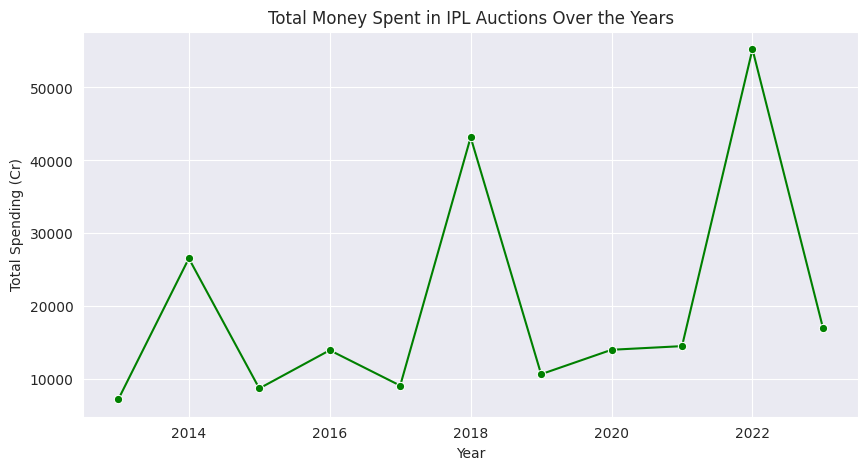

In [39]:
#Total Spending Per Year
yearly_spending = data.groupby('Year')['Winning bid'].sum().reset_index()

# Plot spending trend over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_spending['Year'], y=yearly_spending['Winning bid'], marker='o', color='green')
plt.xlabel("Year")
plt.ylabel("Total Spending (Cr)")
plt.title("Total Money Spent in IPL Auctions Over the Years")
plt.show()



In [40]:
# frequency of each team in the dataset
team_frequency = data['Team'].value_counts().reset_index()


team_frequency.columns = ['Team', 'Frequency']


print(team_frequency)

                           Team  Frequency
0              Delhi Daredevils        134
1           Sunrisers Hyderabad        125
2   Royal Challengers Bangalore        123
3                  Punjab Kings        122
4         Kolkata Knight Riders        116
5                Mumbai Indians        115
6              Rajasthan Royals        111
7           Chennai Super Kings         90
8                Gujarat Titans         57
9          Lucknow Super Giants         28
10       Rising Pune Supergiant         27
11                Pune Warriors          4


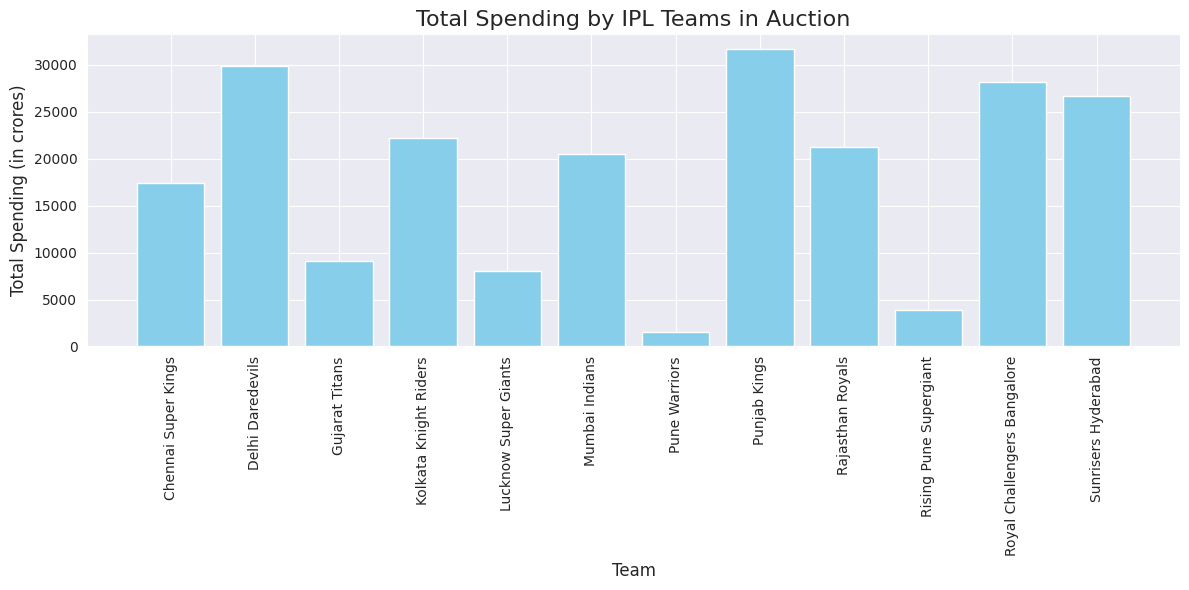

In [41]:
#Total Spending by Each Team

total_spending_by_team = data.groupby('Team')['Winning bid'].sum().reset_index()



# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(total_spending_by_team['Team'], total_spending_by_team['Winning bid'], color='skyblue')
total_spending_by_team = total_spending_by_team.sort_values(by='Winning bid', ascending=False)

plt.title('Total Spending by IPL Teams in Auction', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Spending (in crores)', fontsize=12)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

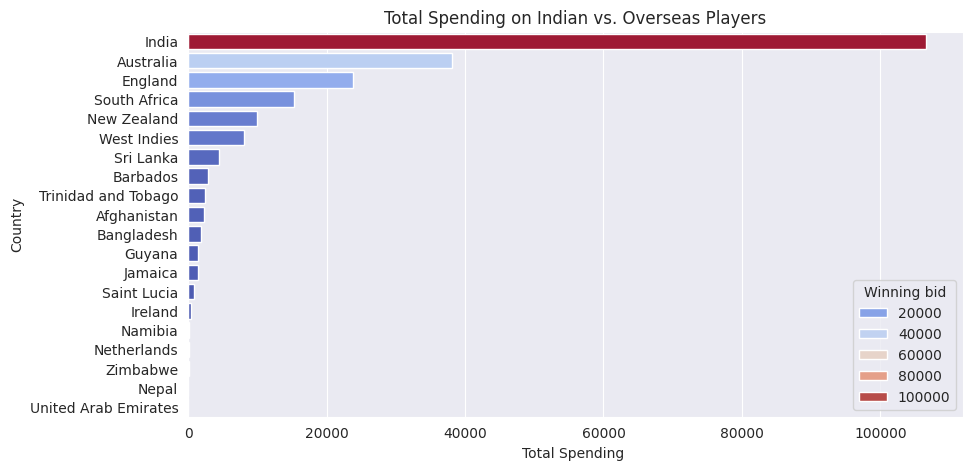

In [42]:
#Spending on Indian vs. Overseas Players

# Grouping by country and sum total spending
country_spending = data.groupby('Country')['Winning bid'].sum().reset_index().sort_values(by='Winning bid', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Winning bid', y='Country', data=country_spending,hue='Winning bid', palette="coolwarm")
plt.xlabel("Total Spending ")
plt.ylabel("Country")
plt.title("Total Spending on Indian vs. Overseas Players")
plt.show()



In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data_player_stats[['years_in_auction', 'avg_winning_bid', 'total_earnings']]  #  feature selection
features = features.apply(pd.to_numeric, errors='coerce')  # Ensure all are numeric


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)





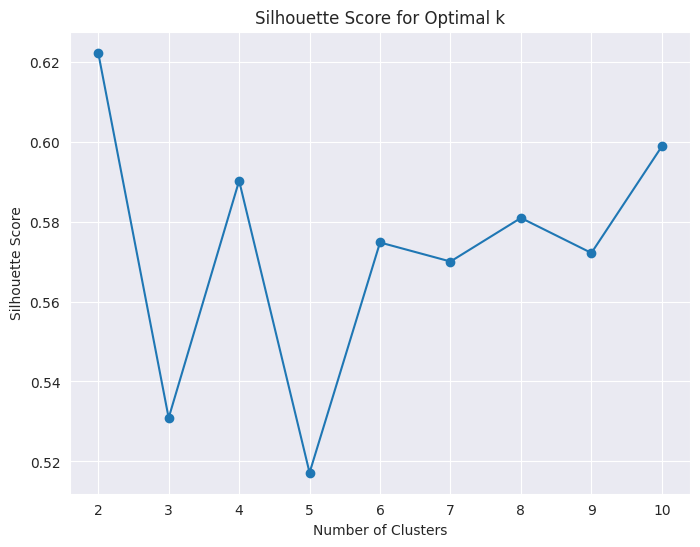

In [44]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sil_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [45]:
# Applying K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  # Ensure n_init is set (fixes sklearn v1.4 warning)
data_player_stats['cluster'] = kmeans.fit_predict(features_scaled)

display(data_player_stats[['Player', 'cluster']].head(10))  # Show clustered players

# Calculating the mean for numerical columns only
numerical_cols = ['years_in_auction', 'avg_winning_bid', 'total_earnings']
display(data_player_stats.groupby('cluster')[numerical_cols].mean())

Player  cluster
0                  Aaron Finch        0
1                 Abdul Basith        1
2                  Abdul Samad        1
3               Abhijeet Tomar        1
4             Abhimanyu Mithun        1
5  Abhinav Manohar Sadarangani        1
6               Abhishek Nayar        1
7              Abhishek Sharma        1
8             Abu Nechim Ahmed        1
9                   Adam Milne        1

years_in_auction  avg_winning_bid  total_earnings
cluster                                                   
0                3.196429       486.767592     1378.780357
1                1.442827        92.587959      137.019647

In [46]:
# Grouping data by clusters and calculating summary statistics (mean, median)
cluster_summary = data_player_stats.groupby('cluster').agg({
    'avg_winning_bid': ['mean', 'median', 'std'],
    'years_in_auction': ['mean', 'median'],
    'total_earnings': ['mean', 'median']
}).reset_index()


display(cluster_summary)

cluster avg_winning_bid                    years_in_auction         \
                     mean median         std             mean median   
0       0      486.767592  427.5  279.027251         3.196429    3.0   
1       1       92.587959   40.0  107.582543         1.442827    1.0   

  total_earnings          
            mean  median  
0    1378.780357  1205.0  
1     137.019647    50.0

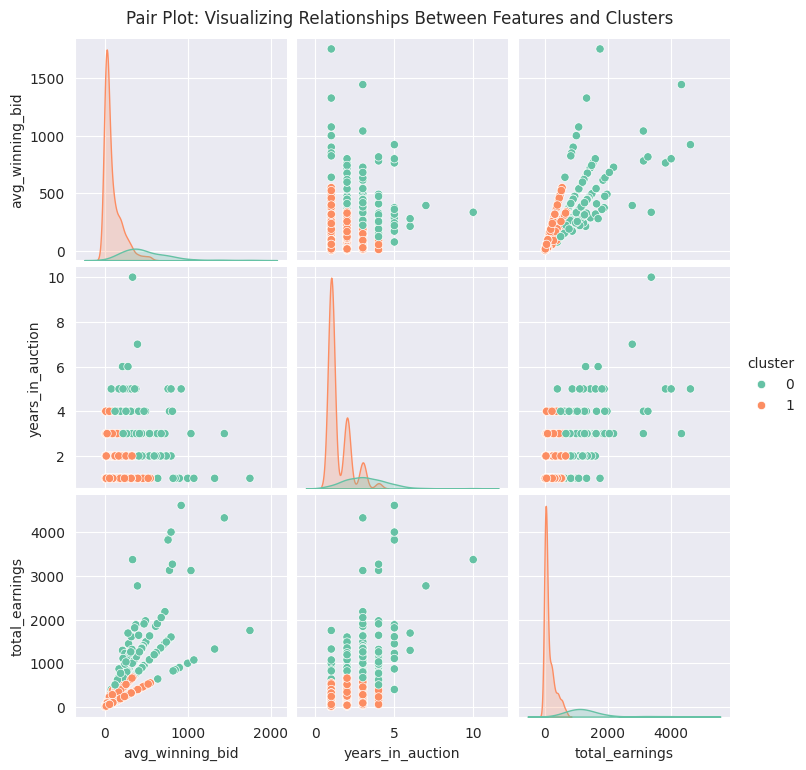

In [47]:
# Pair Plot: This will give all pairwise relationships between the features
sns.pairplot(data_player_stats, hue='cluster', vars=['avg_winning_bid', 'years_in_auction', 'total_earnings'], palette='Set2')
plt.suptitle('Pair Plot: Visualizing Relationships Between Features and Clusters', y=1.02)
plt.show()


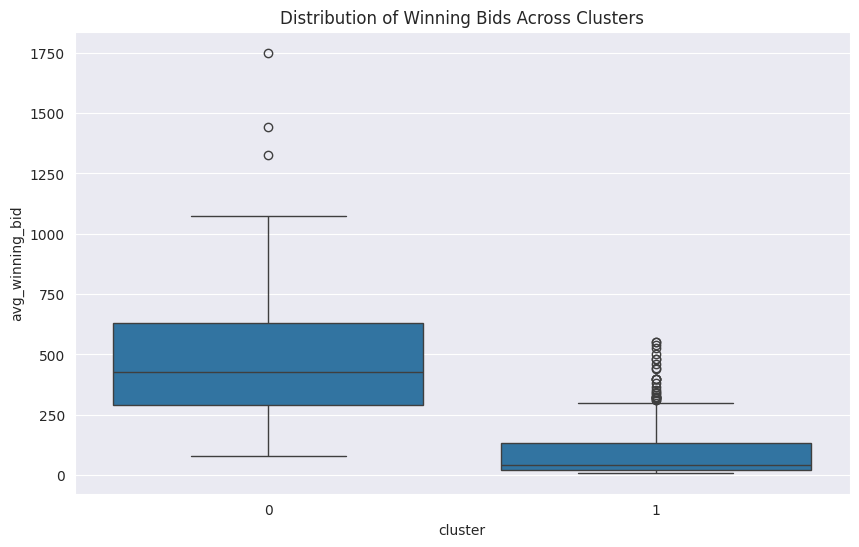

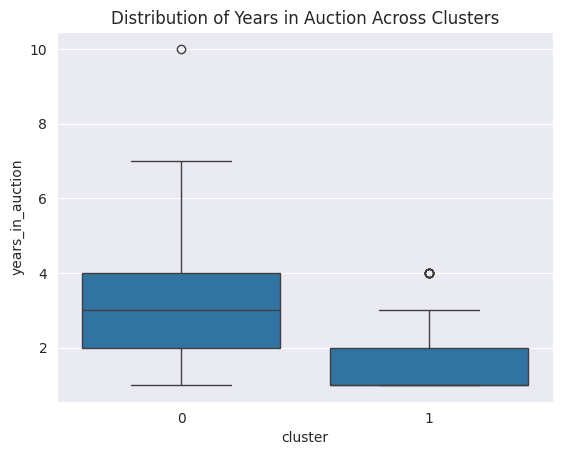

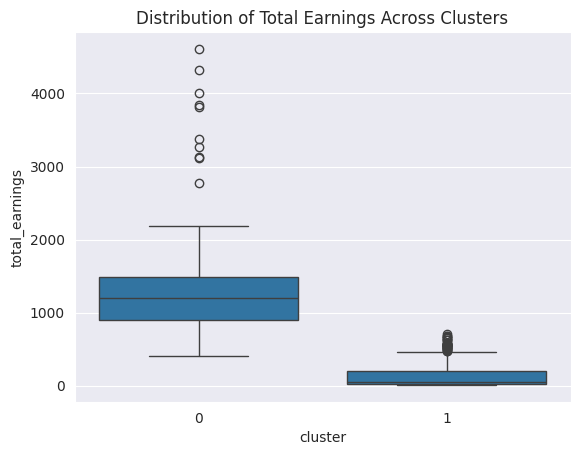

In [48]:
# Visualizing the distribution of players in each cluster for key features
plt.figure(figsize=(10, 6))

sns.boxplot(x='cluster', y='avg_winning_bid', data=data_player_stats)
plt.title('Distribution of Winning Bids Across Clusters')
plt.show()

sns.boxplot(x='cluster', y='years_in_auction', data=data_player_stats)
plt.title('Distribution of Years in Auction Across Clusters')
plt.show()

sns.boxplot(x='cluster', y='total_earnings', data=data_player_stats)
plt.title('Distribution of Total Earnings Across Clusters')
plt.show()


In [49]:
data.dtypes


Country                     object
Player                      object
Team                        object
Base price                 float64
Winning bid                float64
Year                         int64
Bid_to_Base_Price_Ratio    float64
Bid_Difference             float64
Avg_Bid_by_Year            float64
Years_in_Auction             int64
dtype: object

 Pie Chart: Players Bought from Each Country

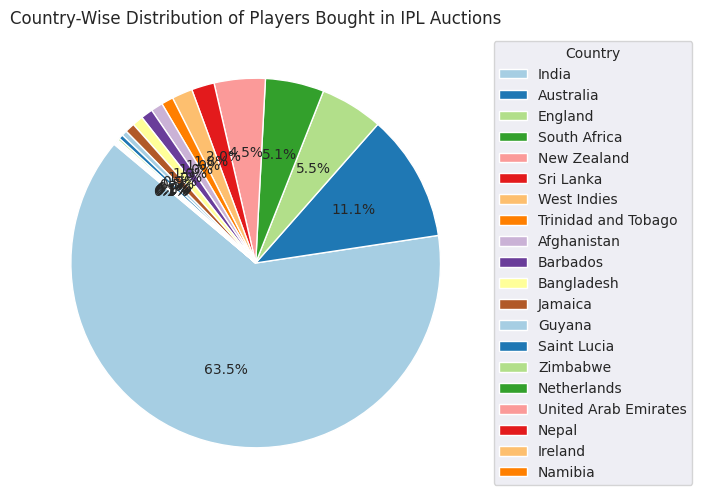

In [50]:
import matplotlib.pyplot as plt


country_counts = data['Country'].value_counts()


colors = plt.cm.Paired.colors[:len(country_counts)]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    country_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=colors
)


ax.legend(wedges, country_counts.index, title="Country", loc="center left", bbox_to_anchor=(1, 0.5))


plt.title("Country-Wise Distribution of Players Bought in IPL Auctions")


plt.show()



Heatmap: Players Bought Per Country Over Different Seasons

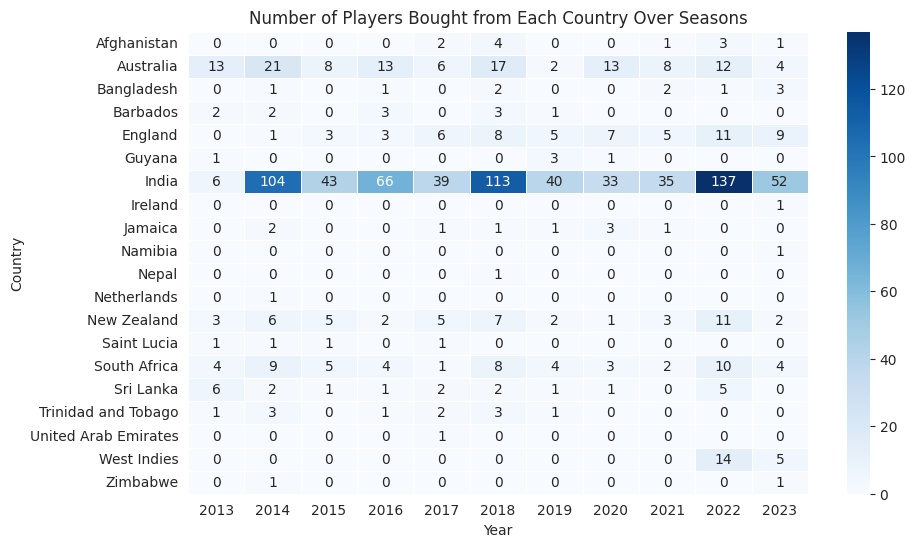

In [51]:
import seaborn as sns
import pandas as pd

# Creating a pivot table for heatmap
heatmap_data = data.pivot_table(index='Country', columns='Year', aggfunc='size', fill_value=0)

# Plot  heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt="d", linewidths=0.5)
plt.title("Number of Players Bought from Each Country Over Seasons")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


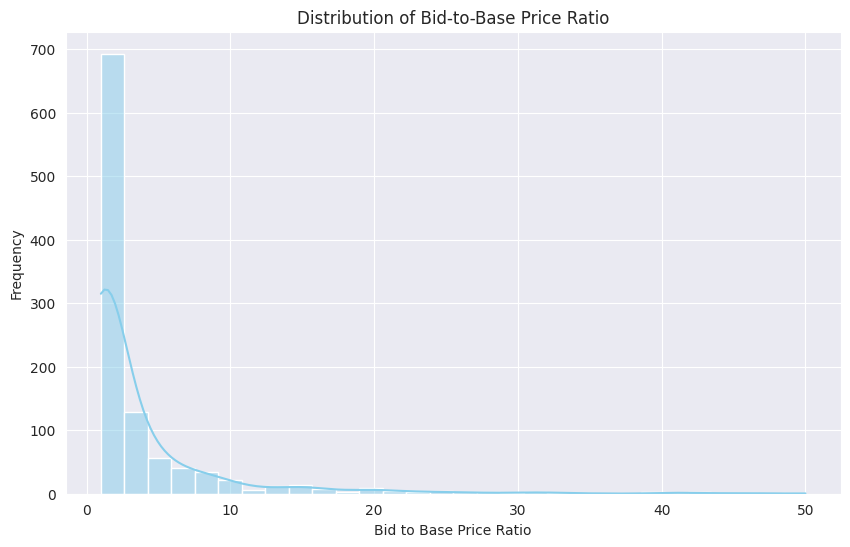

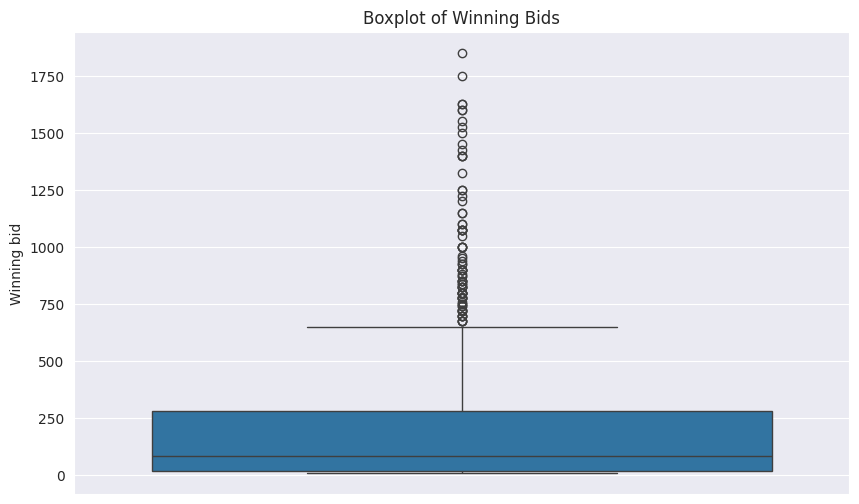

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Bid-to-Base Price Ratio
plt.figure(figsize=(10,6))
sns.histplot(data['Bid_to_Base_Price_Ratio'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Bid-to-Base Price Ratio')
plt.xlabel('Bid to Base Price Ratio')
plt.ylabel('Frequency')
plt.show()

# Distribution of Winning Bids
plt.figure(figsize=(10,6))
sns.boxplot(y=data['Winning bid'])
plt.title('Boxplot of Winning Bids')
plt.show()


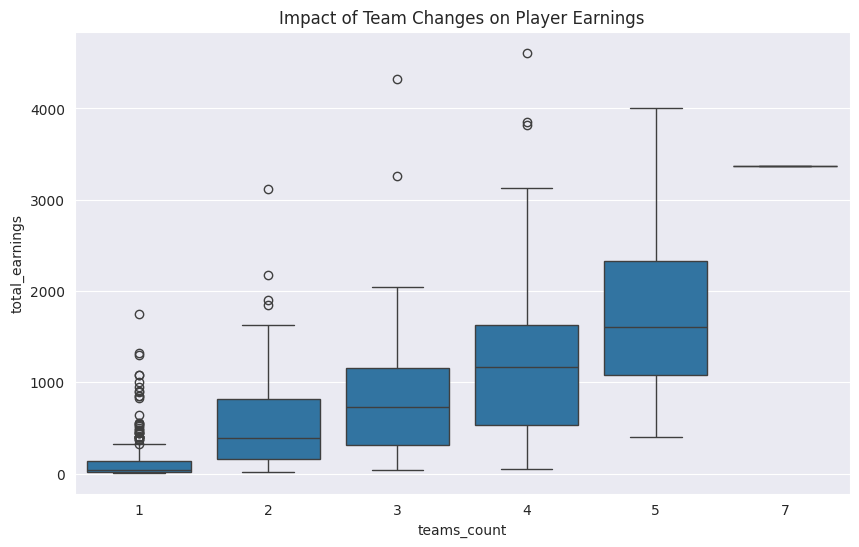

In [53]:
# Team Changes vs. Total Earnings
plt.figure(figsize=(10,6))
sns.boxplot(data=data_player_stats, x='teams_count', y='total_earnings')
plt.title('Impact of Team Changes on Player Earnings')
plt.show()

In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression


X = data[['Base price']]
y = data['Winning bid']


model = LinearRegression()

import pandas as pd
from sklearn.linear_model import LinearRegression


X = data[['Base price']]
y = data['Winning bid']


model = LinearRegression()

model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope of the regression line: {slope:.2f}")


print(f"Intercept of the regression line: {intercept:.2f}")



Slope of the regression line: 2.71
Intercept of the regression line: 32.42


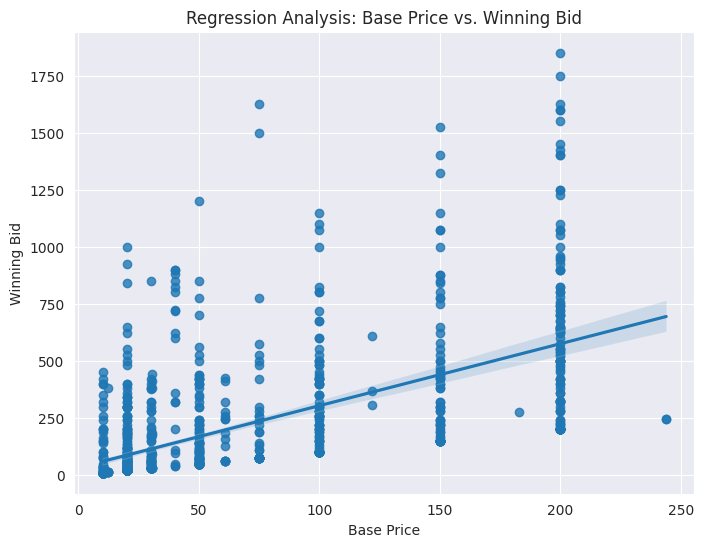

In [55]:
#  Regression Analysis: Base Price vs. Winning Bid
plt.figure(figsize=(8,6))
sns.regplot(x='Base price', y='Winning bid', data=data)
plt.title("Regression Analysis: Base Price vs. Winning Bid")
plt.xlabel("Base Price")
plt.ylabel("Winning Bid")
plt.show()


in the above regression accurate feautures not taken as base price alone cant predict winning bid accurately

In [56]:
#linear regression
from sklearn.metrics import mean_squared_error, r2_score
X = data[['Base price', 'Years_in_Auction']]
y = data['Winning bid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")





Mean Squared Error: 63806.44902004185
R-squared: 0.3308755366523709
Intercept: -20.751631878783627
Coefficients: [ 2.59052868 23.86679244]


model is not accurate

Visualize Feature Importance

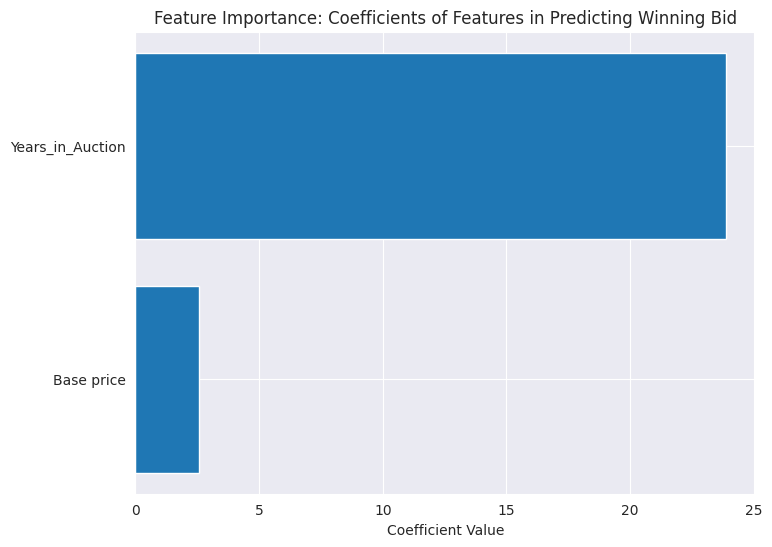

In [57]:
import matplotlib.pyplot as plt
import numpy as np

features = X.columns
coefficients = model.coef_

# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance: Coefficients of Features in Predicting Winning Bid')
plt.show()


Identifying Undervalued or Overvalued Players(Detecting players whose winning bids were significantly different from expected)

In [58]:
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


rf = RandomForestRegressor(n_estimators=100, random_state=42)
label_enc = LabelEncoder()
data["Player"] = label_enc.fit_transform(data["Player"])
data["Team"] = label_enc.fit_transform(data["Team"])

X = data[["Player", "Team", "Base price", "Year"]]
y = data["Winning bid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)


data["Expected_Bid"] = rf.predict(X)
data["Deviation"] = data["Winning bid"] - data["Expected_Bid"]

# Applying Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.1, random_state=42)
data["Anomaly"] = iso_forest.fit_predict(data[["Deviation"]])

# Identifying Overvalued & Undervalued Players
overvalued = data[data["Anomaly"] == 1]
undervalued = data[data["Anomaly"] == -1]

display("Overvalued Players:", overvalued)
display("Undervalued Players", undervalued)


'Overvalued Players:'

Country  Player  Team  Base price  Winning bid  Year  \
0           Guyana     118    10        30.5         30.5  2013   
1     South Africa     226     1       183.0        274.5  2013   
2        Australia     127    10        61.0         61.0  2013   
4        Australia     351     5        61.0        274.5  2013   
5        Sri Lanka      25     0        12.2         12.2  2013   
...            ...     ...   ...         ...          ...   ...   
1047       England     223     8       100.0        100.0  2023   
1048    Bangladesh     484     3       150.0        150.0  2023   
1049         India       1     8        20.0         20.0  2023   
1050       England     223     8       100.0        100.0  2023   
1051    Bangladesh     484     3       150.0        150.0  2023   

      Bid_to_Base_Price_Ratio  Bid_Difference  Avg_Bid_by_Year  \
0                         1.0             0.0       195.941892   
1                         1.5            91.5       195.941892   
2                         1.0             0.0       195.941892   
4                         4.5           213.5       195.941892   
5                         1.0             0.0       195.941892   
...                       ...             ...              ...   
1047                      1.0             0.0       205.421687   
1048                      1.0             0.0       205.421687   
1049                      1.0             0.0       205.421687   
1050                      1.0             0.0       205.421687   
1051                      1.0             0.0       205.421687   

      Years_in_Auction  Expected_Bid  Deviation  Anomaly  
0                    1      102.5640   -72.0640        1  
1                    1      382.7300  -108.2300        1  
2                    3      215.3010  -154.3010        1  
4                    7      273.8925     0.6075        1  
5                    2       68.9530   -56.7530        1  
...                ...           ...        ...      ...  
1047                 1      123.3500   -23.3500        1  
1048                 1      338.7500  -188.7500        1  
1049                 1       48.5500   -28.5500        1  
1050                 1      123.3500   -23.3500        1  
1051                 1      338.7500  -188.7500        1  

[946 rows x 13 columns]

'Undervalued Players'

Country  Player  Team  Base price  Winning bid  Year  \
3        Australia     314     6       244.0        244.0  2013   
12       Australia     383     5        61.0         61.0  2013   
23     New Zealand     201     5        30.5         30.5  2013   
39         England     253     1       200.0        900.0  2014   
41           India     589    10       200.0       1400.0  2014   
...            ...     ...   ...         ...          ...   ...   
989          India     572    11        20.0        260.0  2023   
999          India     341     1        20.0        550.0  2023   
1019       Ireland     231     2        50.0        440.0  2023   
1034  South Africa     439    10       200.0        460.0  2023   
1037     Australia      10     8       150.0        150.0  2023   

      Bid_to_Base_Price_Ratio  Bid_Difference  Avg_Bid_by_Year  \
3                         1.0             0.0       195.941892   
12                        1.0             0.0       195.941892   
23                        1.0             0.0       195.941892   
39                        4.5           700.0       172.467532   
41                        7.0          1200.0       172.467532   
...                       ...             ...              ...   
989                      13.0           240.0       205.421687   
999                      27.5           530.0       205.421687   
1019                      8.8           390.0       205.421687   
1034                      2.3           260.0       205.421687   
1037                      1.0             0.0       205.421687   

      Years_in_Auction  Expected_Bid  Deviation  Anomaly  
3                    1      484.3900  -240.3900       -1  
12                   1      251.6475  -190.6475       -1  
23                   1      234.2820  -203.7820       -1  
39                   3      512.3250   387.6750       -1  
41                   5     1064.5900   335.4100       -1  
...                ...           ...        ...      ...  
989                  1       66.8500   193.1500       -1  
999                  1      348.5000   201.5000       -1  
1019                 1       99.7500   340.2500       -1  
1034                 1      762.4000  -302.4000       -1  
1037                 2      392.2500  -242.2500       -1  

[106 rows x 13 columns]

Year  Base price  Winning bid
0   2013   66.083333   238.916667
1   2014   52.307692   140.721154
2   2015   30.000000   122.906977
3   2016   38.181818   130.227273
4   2017   16.666667    63.461538
5   2018   59.159292   223.008850
6   2019   36.375000   160.500000
7   2020   31.515152   100.909091
8   2021   36.857143    97.142857
9   2022   53.175182   229.890511
10  2023   28.076923    83.173077

Mean Squared Error (MSE): 4249.123209215234
Root Mean Squared Error (RMSE): 65.18529902681458
R² Score: -99.13975143207746
Predicted Average Winning Bid for 2024: 115.19386408721084
Predicted Average Winning Bid for 2025: 113.167306093756


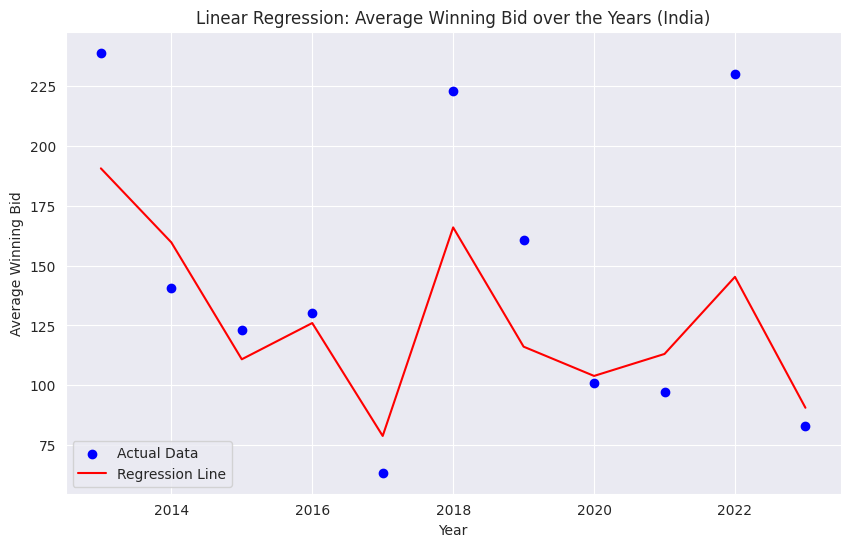

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.model_selection import train_test_split

# Filtering data for India
india_data = data[data['Country'] == 'India']


india_grouped = india_data.groupby('Year').agg({'Base price': 'mean', 'Winning bid': 'mean'}).reset_index()

india_grouped = india_grouped[['Year', 'Base price', 'Winning bid']]


display(india_grouped)


X = india_grouped[['Year', 'Base price']]
y = india_grouped['Winning bid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


future_years = pd.DataFrame({'Year': [2024, 2025], 'Base price': [india_grouped['Base price'].mean()] * 2})
future_predictions = model.predict(future_years)

print(f"Predicted Average Winning Bid for 2024: {future_predictions[0]}")
print(f"Predicted Average Winning Bid for 2025: {future_predictions[1]}")

# Plotting the regression analysis
plt.figure(figsize=(10, 6))

plt.scatter(india_grouped['Year'], india_grouped['Winning bid'], color='blue', label='Actual Data')

plt.plot(india_grouped['Year'], model.predict(india_grouped[['Year', 'Base price']]), color='red', label='Regression Line')

plt.title('Linear Regression: Average Winning Bid over the Years (India)')
plt.xlabel('Year')
plt.ylabel('Average Winning Bid')
plt.legend()

plt.show()


In [60]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()


X = india_grouped[['Year']]
y = india_grouped['Base price']

lr_model.fit(X, y)

# Predict for future years (2024 and 2025)
future_years = pd.DataFrame({'Year': [2024, 2025]})
future_base_prices = lr_model.predict(future_years)

print(f"Base price prediction for 2024 (Linear Regression): {future_base_prices[0]}")
print(f"Base price prediction for 2025 (Linear Regression): {future_base_prices[1]}")



Base price prediction for 2024 (Linear Regression): 32.05716411338608
Base price prediction for 2025 (Linear Regression): 30.606112640527954


Using median

Mean Squared Error (MSE): 506.7717567508962
Root Mean Squared Error (RMSE): 22.511591608566825
R² Score: -0.2669293918772404
Predicted Median Winning Bid for 2024: -5.5642605633802305
Predicted Median Winning Bid for 2025: -12.580105633802305


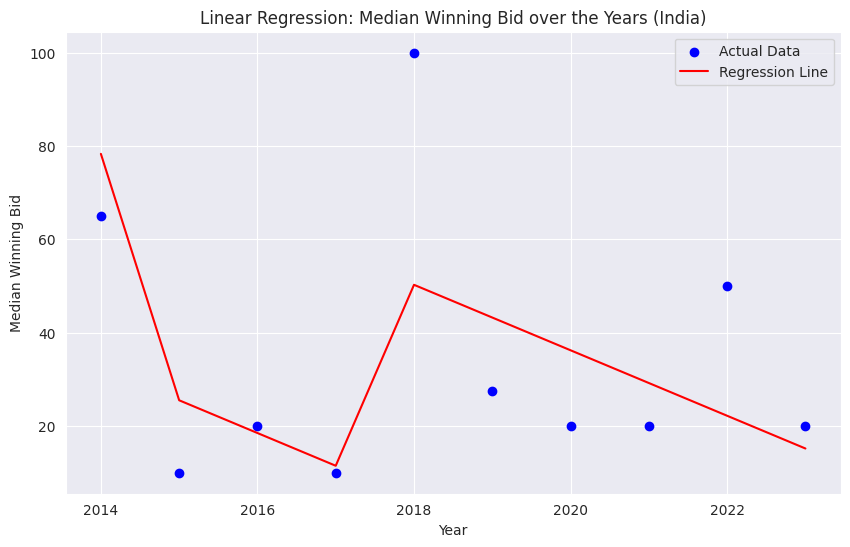

In [61]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#removing outlier
india_data_filtered = india_data[india_data['Year'] != 2013]


india_grouped = india_data_filtered.groupby('Year').agg({'Base price': 'median', 'Winning bid': 'median'}).reset_index()


X = india_grouped[['Year', 'Base price']]
y = india_grouped['Winning bid']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

future_years = pd.DataFrame({'Year': [2024, 2025], 'Base price': [india_grouped['Base price'].mean()] * 2})
future_predictions = model.predict(future_years)

print(f"Predicted Median Winning Bid for 2024: {future_predictions[0]}")
print(f"Predicted Median Winning Bid for 2025: {future_predictions[1]}")

plt.figure(figsize=(10, 6))

plt.scatter(india_grouped['Year'], india_grouped['Winning bid'], color='blue', label='Actual Data')


plt.plot(india_grouped['Year'], model.predict(india_grouped[['Year', 'Base price']]), color='red', label='Regression Line')


plt.title('Linear Regression: Median Winning Bid over the Years (India)')
plt.xlabel('Year')
plt.ylabel('Median Winning Bid')
plt.legend()




Linear regression - MSE: 500.0, RMSE: 22.360679774997898, R²: -0.25
Decision Tree - MSE: 500.0, RMSE: 22.360679774997898, R²: -0.25
Random Forest - MSE: 754.4278124999998, RMSE: 27.466849336973468, R²: -0.8860695312499995
XGBoost - MSE: 499.98569500394296, RMSE: 22.360359903273984, R²: -0.2499642375098574


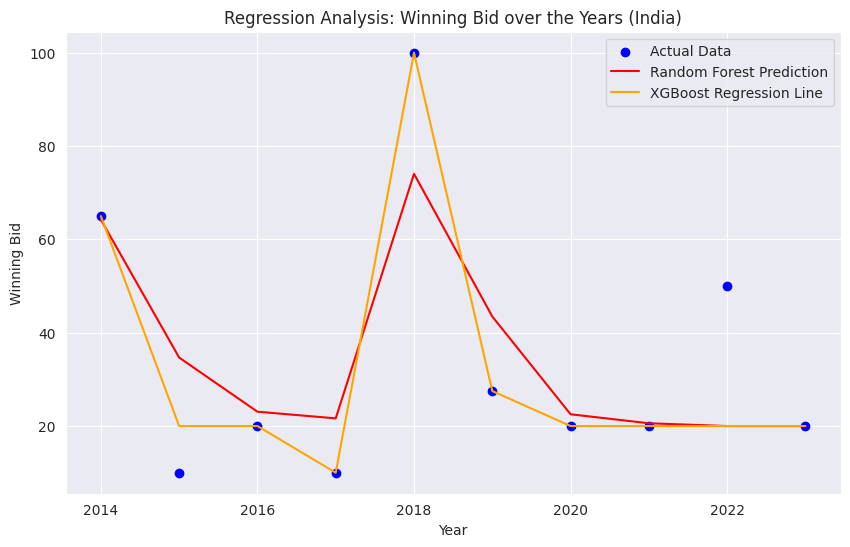

Predicted Median Winning Bid for 2024 (Random Forest): 20.0
Predicted  Median Winning Bid for 2024 (Decision Tree): 20.0
Predicted  Median Winning Bid for 2024 (XGBoost): 20.0003719329834


In [62]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgboost_model = XGBRegressor(random_state=42)

decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_xgb = xgboost_model.predict(X_test)

def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2


dt_mse, dt_rmse, dt_r2 = evaluate_model(y_test, y_pred_dt)
rf_mse, rf_rmse, rf_r2 = evaluate_model(y_test, y_pred_rf)
xgb_mse, xgb_rmse, xgb_r2 = evaluate_model(y_test, y_pred_xgb)


print(f"Linear regression - MSE: {dt_mse}, RMSE: {dt_rmse}, R²: {dt_r2}")
print(f"Decision Tree - MSE: {dt_mse}, RMSE: {dt_rmse}, R²: {dt_r2}")
print(f"Random Forest - MSE: {rf_mse}, RMSE: {rf_rmse}, R²: {rf_r2}")
print(f"XGBoost - MSE: {xgb_mse}, RMSE: {xgb_rmse}, R²: {xgb_r2}")

plt.figure(figsize=(10, 6))

plt.scatter(india_grouped['Year'], india_grouped['Winning bid'], color='blue', label='Actual Data')


plt.plot(india_grouped['Year'], random_forest_model.predict(india_grouped[['Year', 'Base price']]), color='red', label='Random Forest Prediction')


plt.plot(india_grouped['Year'], xgboost_model.predict(india_grouped[['Year', 'Base price']]), color='orange', label='XGBoost Regression Line')


plt.title('Regression Analysis: Winning Bid over the Years (India)')
plt.xlabel('Year')
plt.ylabel('Winning Bid')
plt.legend()
plt.show()


future_years = pd.DataFrame({'Year': [2024], 'Base price': [india_grouped['Base price'].median()] })
future_predictions_rf = random_forest_model.predict(future_years)

print(f"Predicted Median Winning Bid for 2024 (Random Forest): {future_predictions_rf[0]}")

future_predictions_dt = decision_tree_model.predict(future_years)
print(f"Predicted  Median Winning Bid for 2024 (Decision Tree): {future_predictions_dt[0]}")


future_predictions_xgb = xgboost_model.predict(future_years)
print(f"Predicted  Median Winning Bid for 2024 (XGBoost): {future_predictions_xgb[0]}")

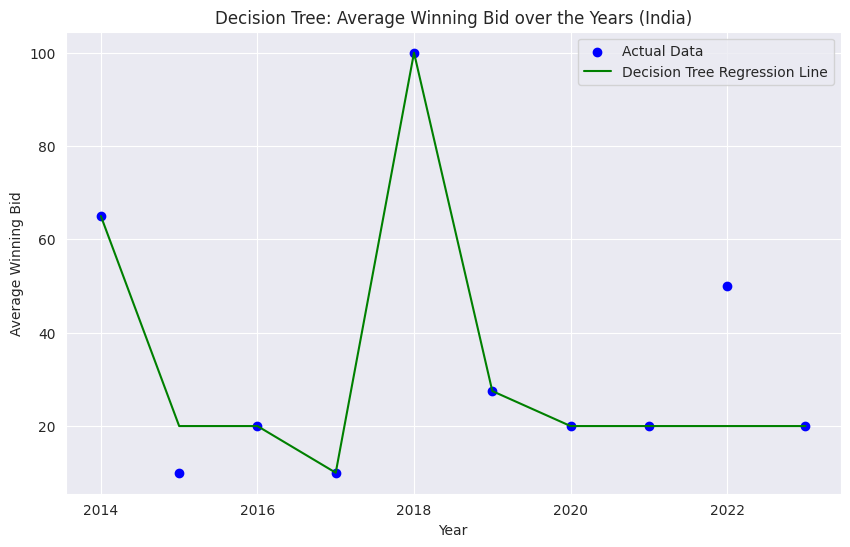

In [63]:

plt.figure(figsize=(10, 6))

plt.scatter(india_grouped['Year'], india_grouped['Winning bid'], color='blue', label='Actual Data')

plt.plot(india_grouped['Year'], decision_tree_model.predict(india_grouped[['Year', 'Base price']]), color='green', label='Decision Tree Regression Line')

plt.title('Decision Tree: Average Winning Bid over the Years (India)')
plt.xlabel('Year')
plt.ylabel('Average Winning Bid')
plt.legend()

Random Forest Regressor to predict the winning bid based on various features

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


features = ['Base price', 'Bid_to_Base_Price_Ratio', 'Bid_Difference', 'Year', 'Player', 'Team']
target = 'Winning bid'


X = data[features]
y = data[target]

#Handling Categorical Data (One-Hot Encoding)
categorical_features = ['Player', 'Team']
numerical_features = ['Base price', 'Bid_to_Base_Price_Ratio', 'Bid_Difference', 'Year']

# Applying OneHotEncoder to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))


X_encoded.columns = encoder.get_feature_names_out(categorical_features)

# Combining numerical and encoded categorical features
X_processed = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")



RMSE: 15.398223809253384
R² Score: 0.9975135279160554


Predicting Total Spending of a Team Based on Number of Players Bought

R² Score: 0.8866068050476653


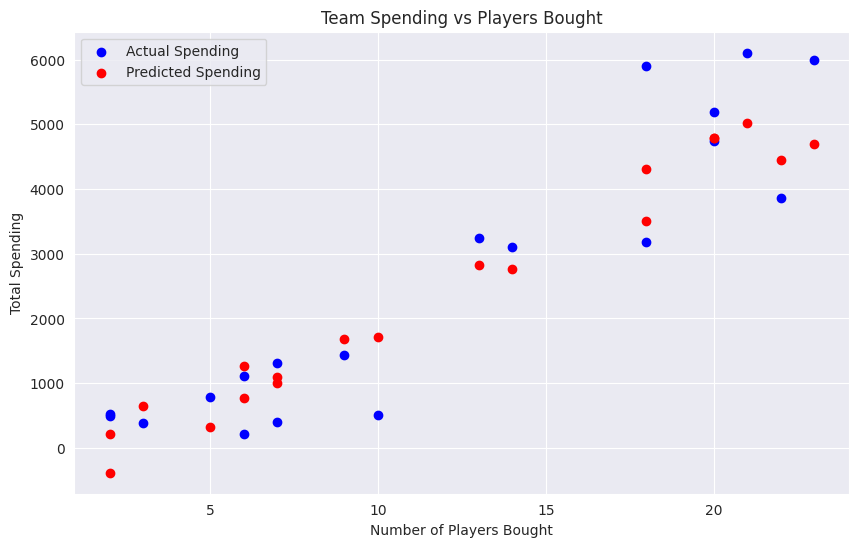

Predicted Total Spending for 2024 (15 Players): 3796.9113679088478


In [65]:





#  Calculating total spending and number of players bought per team per year
team_spending = data.groupby(['Team', 'Year']).agg({
    'Winning bid': 'sum',          # Total spending
    'Team': 'count'                # Number of players bought
}).rename(columns={'Team': 'Players Bought'}).reset_index()


X = team_spending[['Year', 'Players Bought']]
y = team_spending['Winning bid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



r2 = r2_score(y_test, y_pred)


print(f"R² Score: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(X_test['Players Bought'], y_test, color='blue', label='Actual Spending')
plt.scatter(X_test['Players Bought'], y_pred, color='red', label='Predicted Spending')
plt.xlabel('Number of Players Bought')
plt.ylabel('Total Spending')
plt.title('Team Spending vs Players Bought')
plt.legend()
plt.show()

# Predicting Future Spending assuming 2024 for a team buying 15 players)
future_data = pd.DataFrame({'Year': [2024], 'Players Bought': [15]})
future_spending_prediction = model.predict(future_data)

print(f"Predicted Total Spending for 2024 (15 Players): {future_spending_prediction[0]}")
